In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from math import *

In [2]:
rosters_df = pd.read_csv("League Roster 2125 v2.csv")
rosters_df.head()

,Last,First,Age,Pos,Team,Level,Bat,Throw,Run,Arm,...,P6,P6_Qual,P6_vL_AVG,P6_vL_OBP,P6_vL_SLG,P6_vR_AVG,P6_vR_OBP,P6_vR_SLG,P_GB,Unnamed: 96
0,Tyler,George,24,1B,LYNC,AA,R,R,2.36,5.34,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.89,NaN
1,Maisey Jr,Jerry,21,C,BILL,A,R,R,2.32,3.53,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.13,NaN
2,van der Linde,Dutch,23,1B,RICH,ML,S,R,2.31,2.86,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.28,NaN
3,Bell,Ken,23,1B,IDA,AA,R,R,1.15,5.79,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.77,NaN
4,Lafleur,Clyde,27,C,HART,AAA,R,R,4.35,8.25,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.47,NaN


In [3]:
#Bring in Pro Years Report
proyears_df = pd.read_csv("Pro Years Report 2125 v2.csv")
proyears_df.info()
#Join the Pro Years Report with Roster File
rosters_exp = rosters_df.copy()
rosters_exp['Pro Years'] = proyears_df[['Pro Years']].copy()
#Show info of combined dataframe
rosters_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Firstname  3173 non-null   object
 1   Lastname   3173 non-null   object
 2   Pos        3173 non-null   object
 3   Team       3173 non-null   object
 4   Level      3173 non-null   object
 5   Pro Years  3173 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 148.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 98 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Last         3173 non-null   object 
 1   First        3173 non-null   object 
 2   Age          3173 non-null   int64  
 3   Pos          3173 non-null   object 
 4   Team         3173 non-null   object 
 5   Level        3173 non-null   object 
 6   Bat          3173 non-null   object 
 7   Throw        3173 non-null   object 
 8 

In [4]:
rosters_exp.describe()

,Age,Run,Arm,IF_Rng,OF_Rng,Fld,F_P,F_C,F_1B,F_2B,...,P6_Qual,P6_vL_AVG,P6_vL_OBP,P6_vL_SLG,P6_vR_AVG,P6_vR_OBP,P6_vR_SLG,P_GB,Unnamed: 96,Pro Years
count,3173.000000,3173.000000,3173.000000,3173.000000,3173.000000,3173.000000,3173.000000,3173.000000,3173.000000,3173.000000,...,3173.000000,3173.000000,3173.000000,3173.000000,3173.000000,3173.000000,3173.000000,3173.000000,0.0,3173.000000
mean,24.335960,3.230003,7.090914,3.711172,3.461913,0.987329,0.427041,0.109975,0.171759,0.152033,...,0.001989,0.006639,0.007985,0.010346,0.006489,0.007791,0.010039,48.970668,NaN,1.345099
std,4.888668,1.414751,2.021156,1.527303,1.505419,0.007590,0.494726,0.306872,0.369365,0.350776,...,0.015695,0.046482,0.056198,0.072904,0.045471,0.054845,0.070737,10.232940,NaN,2.897205
min,18.000000,1.000000,1.010000,1.000000,0.670000,0.950000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,NaN,0.000000
25%,20.000000,2.280000,5.590000,2.610000,2.450000,0.983000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.240000,NaN,0.000000
50%,23.000000,3.080000,8.040000,3.560000,3.310000,0.989000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.310000,NaN,0.000000
75%,28.000000,3.790000,8.760000,4.540000,4.160000,0.993000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.950000,NaN,1.000000
max,40.000000,9.990000,9.740000,10.000000,10.000000,0.999000,1.000000,1.000000,1.000000,1.000000,...,0.210000,0.413000,0.542000,0.677000,0.398000,0.524000,0.647000,80.000000,NaN,17.000000


In [5]:
rosters_exp.columns

Index(['Last', 'First', 'Age', 'Pos', 'Team', 'Level', 'Bat', 'Throw', 'Run',
       'Arm', 'IF_Rng', 'OF_Rng', 'Fld', 'F_P', 'F_C', 'F_1B', 'F_2B', 'F_3B',
       'F_SS', 'F_LF', 'F_CF', 'F_RF', 'B_AB', 'B_H', 'B_B2', 'B_B3', 'B_HR',
       'B_BB', 'B_SO', 'vL_AVG', 'vL_OBP', 'vL_SLG', 'vR_AVG', 'vR_OBP',
       'vR_SLG', 'Pull', 'Middle', 'Opp', 'B_GB', 'END', 'P_AB', 'P_H', 'P_B2',
       'P_B3', 'P_HR', 'P_BB', 'P_SO', 'P1', 'P1_Qual', 'P1_vL_AVG',
       'P1_vL_OBP', 'P1_vL_SLG', 'P1_vR_AVG', 'P1_vR_OBP', 'P1_vR_SLG', 'P2',
       'P2_Qual', 'P2_vL_AVG', 'P2_vL_OBP', 'P2_vL_SLG', 'P2_vR_AVG',
       'P2_vR_OBP', 'P2_vR_SLG', 'P3', 'P3_Qual', 'P3_vL_AVG', 'P3_vL_OBP',
       'P3_vL_SLG', 'P3_vR_AVG', 'P3_vR_OBP', 'P3_vR_SLG', 'P4', 'P4_Qual',
       'P4_vL_AVG', 'P4_vL_OBP', 'P4_vL_SLG', 'P4_vR_AVG', 'P4_vR_OBP',
       'P4_vR_SLG', 'P5', 'P5_Qual', 'P5_vL_AVG', 'P5_vL_OBP', 'P5_vL_SLG',
       'P5_vR_AVG', 'P5_vR_OBP', 'P5_vR_SLG', 'P6', 'P6_Qual', 'P6_vL_AVG',
       'P6_vL_OBP',

In [6]:
#Renaming columns
rosters_exp_rename = rosters_exp.rename(columns={"Last":"Last Name","First":"First Name","Age":"Age","Pos":"Primary Position","Team":"Team","Level":"Level","Bat":"Bat","vL_OBP":"OBP v L","vL_SLG":"SLG v L","vR_OBP":"OBP v R","vR_SLG":"SLG v R"})
rosters_exp_rename.head()

,Last Name,First Name,Age,Primary Position,Team,Level,Bat,Throw,Run,Arm,...,P6_Qual,P6_vL_AVG,P6_vL_OBP,P6_vL_SLG,P6_vR_AVG,P6_vR_OBP,P6_vR_SLG,P_GB,Unnamed: 96,Pro Years
0,Tyler,George,24,1B,LYNC,AA,R,R,2.36,5.34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.89,NaN,0
1,Maisey Jr,Jerry,21,C,BILL,A,R,R,2.32,3.53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.13,NaN,0
2,van der Linde,Dutch,23,1B,RICH,ML,S,R,2.31,2.86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.28,NaN,2
3,Bell,Ken,23,1B,IDA,AA,R,R,1.15,5.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.77,NaN,0
4,Lafleur,Clyde,27,C,HART,AAA,R,R,4.35,8.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.47,NaN,0


In [7]:
#Move Pro Years to beginning of dataframe
col_name="Pro Years"
first_col = rosters_exp_rename.pop(col_name)
rosters_exp_rename.insert(2, col_name, first_col)
rosters_exp_rename.head()

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,P6,P6_Qual,P6_vL_AVG,P6_vL_OBP,P6_vL_SLG,P6_vR_AVG,P6_vR_OBP,P6_vR_SLG,P_GB,Unnamed: 96
0,Tyler,George,0,24,1B,LYNC,AA,R,R,2.36,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.89,NaN
1,Maisey Jr,Jerry,0,21,C,BILL,A,R,R,2.32,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.13,NaN
2,van der Linde,Dutch,2,23,1B,RICH,ML,S,R,2.31,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.28,NaN
3,Bell,Ken,0,23,1B,IDA,AA,R,R,1.15,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.77,NaN
4,Lafleur,Clyde,0,27,C,HART,AAA,R,R,4.35,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.47,NaN


In [8]:
rosters_exp_rename.shape

(3173, 98)

In [9]:
#Creating a hitting dataframe for prospects by removing pitching only columns and players with primary position of Pitcher.
hitting_df=rosters_exp_rename.loc[:,"Last Name":"B_GB"]
hitting_df = hitting_df.drop(hitting_df[hitting_df['Primary Position'] == "P"].index)
hitting_df.head()


,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,vL_AVG,OBP v L,SLG v L,vR_AVG,OBP v R,SLG v R,Pull,Middle,Opp,B_GB
0,Tyler,George,0,24,1B,LYNC,AA,R,R,2.36,...,0.252,0.359,0.451,0.235,0.338,0.418,0.269,0.531,0.199,0.46
1,Maisey Jr,Jerry,0,21,C,BILL,A,R,R,2.32,...,0.268,0.315,0.420,0.255,0.298,0.393,0.355,0.387,0.258,0.54
2,van der Linde,Dutch,2,23,1B,RICH,ML,S,R,2.31,...,0.331,0.424,0.666,0.328,0.421,0.663,0.512,0.327,0.161,0.39
3,Bell,Ken,0,23,1B,IDA,AA,R,R,1.15,...,0.281,0.359,0.471,0.267,0.340,0.442,0.455,0.395,0.150,0.57
4,Lafleur,Clyde,0,27,C,HART,AAA,R,R,4.35,...,0.265,0.341,0.384,0.250,0.322,0.355,0.336,0.401,0.262,0.73


In [10]:
#Filter out rookies from updated frame
rookie_hitting_df=hitting_df[(hitting_df['Age']< 26) & (hitting_df['Pro Years'] == 0)]
rookie_hitting_df.head()

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,vL_AVG,OBP v L,SLG v L,vR_AVG,OBP v R,SLG v R,Pull,Middle,Opp,B_GB
0,Tyler,George,0,24,1B,LYNC,AA,R,R,2.36,...,0.252,0.359,0.451,0.235,0.338,0.418,0.269,0.531,0.199,0.46
1,Maisey Jr,Jerry,0,21,C,BILL,A,R,R,2.32,...,0.268,0.315,0.420,0.255,0.298,0.393,0.355,0.387,0.258,0.54
3,Bell,Ken,0,23,1B,IDA,AA,R,R,1.15,...,0.281,0.359,0.471,0.267,0.340,0.442,0.455,0.395,0.150,0.57
5,Justice,Bernard,0,23,2B,WISC,AA,R,R,3.25,...,0.264,0.324,0.399,0.249,0.306,0.370,0.305,0.544,0.151,0.53
7,Gonzales,Amado,0,23,1B,BILL,AAA,R,R,1.99,...,0.304,0.351,0.403,0.294,0.338,0.383,0.340,0.424,0.237,0.42


In [11]:
#define variables
hitting_df["OPS"] = ((hitting_df["OBP v L"] + hitting_df["SLG v L"]) * 0.25) + ((hitting_df["OBP v R"] + hitting_df["SLG v R"]) * 0.75)
#hitting_df["Hit Tool"] = ((hitting_df["vL_AVG"]+((hitting_df["OBP v L"]-hitting_df["vL_AVG"])+(hitting_df["SLG v L"]-hitting_df["vL_AVG"]))*.25)+
#                          ((hitting_df["vR_AVG"]+((hitting_df["OBP v R"]-hitting_df["vR_AVG"])+(hitting_df["SLG v R"]-hitting_df["vR_AVG"]))*.75)))
#hitting_df["wOBA"] = (((hitting_df["B_BB"]*0.69)+(((hitting_df["B_H"]-hitting_df["B_B2"]-hitting_df["B_B3"]-hitting_df["B_HR"])*0.888)+(hitting_df["B_B2"]*1.271)+(hitting_df["B_B3"]*1.616)+(hitting_df["B_HR"]*2.101)))/(hitting_df["B_AB"]+hitting_df["B_BB"]))

hitting_df.head()


,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,OBP v L,SLG v L,vR_AVG,OBP v R,SLG v R,Pull,Middle,Opp,B_GB,OPS
0,Tyler,George,0,24,1B,LYNC,AA,R,R,2.36,...,0.359,0.451,0.235,0.338,0.418,0.269,0.531,0.199,0.46,0.7695
1,Maisey Jr,Jerry,0,21,C,BILL,A,R,R,2.32,...,0.315,0.420,0.255,0.298,0.393,0.355,0.387,0.258,0.54,0.7020
2,van der Linde,Dutch,2,23,1B,RICH,ML,S,R,2.31,...,0.424,0.666,0.328,0.421,0.663,0.512,0.327,0.161,0.39,1.0855
3,Bell,Ken,0,23,1B,IDA,AA,R,R,1.15,...,0.359,0.471,0.267,0.340,0.442,0.455,0.395,0.150,0.57,0.7940
4,Lafleur,Clyde,0,27,C,HART,AAA,R,R,4.35,...,0.341,0.384,0.250,0.322,0.355,0.336,0.401,0.262,0.73,0.6890


In [12]:
hitting_df.dtypes

Last Name            object
First Name           object
Pro Years             int64
Age                   int64
Primary Position     object
Team                 object
Level                object
Bat                  object
Throw                object
Run                 float64
Arm                 float64
IF_Rng              float64
OF_Rng              float64
Fld                 float64
F_P                 float64
F_C                 float64
F_1B                float64
F_2B                float64
F_3B                float64
F_SS                float64
F_LF                float64
F_CF                float64
F_RF                float64
B_AB                  int64
B_H                   int64
B_B2                  int64
B_B3                  int64
B_HR                  int64
B_BB                  int64
B_SO                  int64
vL_AVG              float64
OBP v L             float64
SLG v L             float64
vR_AVG              float64
OBP v R             float64
SLG v R             

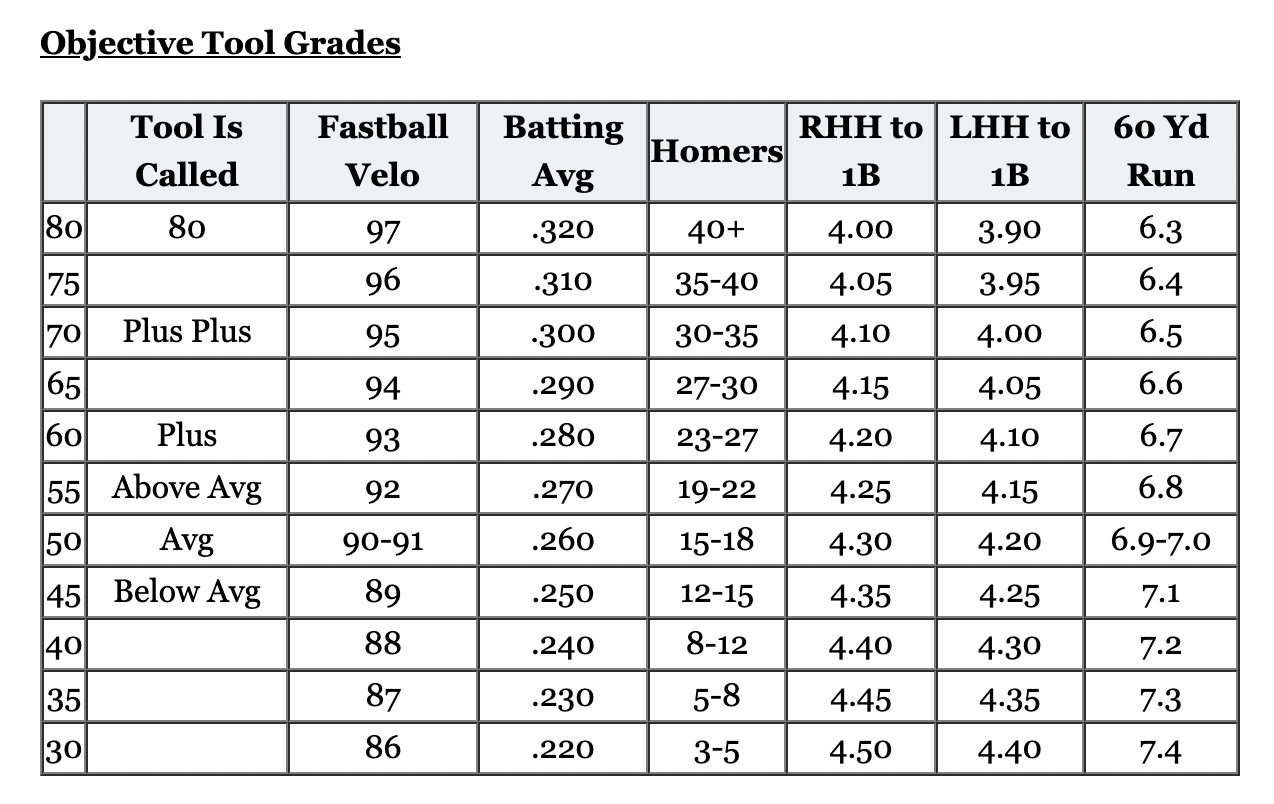

In [13]:
#define hitting tools using bins
# Bins are based on average arm in the league and what should be elite  
arm_bins = [3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 8.99]

# Create the names for the four bins
arm_grades = ["30", "35", "40", "45", "50", "55","60","65","70","75","80"]

In [14]:
hitting_df["Arm Grade"] = pd.cut(hitting_df["Arm"], arm_bins, labels=arm_grades)
hitting_df.head()

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,SLG v L,vR_AVG,OBP v R,SLG v R,Pull,Middle,Opp,B_GB,OPS,Arm Grade
0,Tyler,George,0,24,1B,LYNC,AA,R,R,2.36,...,0.451,0.235,0.338,0.418,0.269,0.531,0.199,0.46,0.7695,45
1,Maisey Jr,Jerry,0,21,C,BILL,A,R,R,2.32,...,0.420,0.255,0.298,0.393,0.355,0.387,0.258,0.54,0.7020,30
2,van der Linde,Dutch,2,23,1B,RICH,ML,S,R,2.31,...,0.666,0.328,0.421,0.663,0.512,0.327,0.161,0.39,1.0855,NaN
3,Bell,Ken,0,23,1B,IDA,AA,R,R,1.15,...,0.471,0.267,0.340,0.442,0.455,0.395,0.150,0.57,0.7940,50
4,Lafleur,Clyde,0,27,C,HART,AAA,R,R,4.35,...,0.384,0.250,0.322,0.355,0.336,0.401,0.262,0.73,0.6890,75


In [15]:
#print to csv
hitting_df.to_csv ('hitters_arm_grade.csv', index = False, header=True)

In [16]:
x=138/600
x

0.23

In [17]:
#define hitting tools using bins
# Bins are based on average hit tool in the league and what should be elite  
hit_bins = [130, 132, 138, 144, 150, 156, 162, 168, 174, 180, 186, 192]

# Create the names for the four bins
hit_grades = ["30", "35", "40", "45", "50", "55", "60","65","70","75","80"]

In [18]:
hitting_df["Hit Grade"] = pd.cut(hitting_df["B_H"], hit_bins, labels=hit_grades)
hitting_df.head()

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,vR_AVG,OBP v R,SLG v R,Pull,Middle,Opp,B_GB,OPS,Arm Grade,Hit Grade
0,Tyler,George,0,24,1B,LYNC,AA,R,R,2.36,...,0.235,0.338,0.418,0.269,0.531,0.199,0.46,0.7695,45,45
1,Maisey Jr,Jerry,0,21,C,BILL,A,R,R,2.32,...,0.255,0.298,0.393,0.355,0.387,0.258,0.54,0.7020,30,55
2,van der Linde,Dutch,2,23,1B,RICH,ML,S,R,2.31,...,0.328,0.421,0.663,0.512,0.327,0.161,0.39,1.0855,NaN,NaN
3,Bell,Ken,0,23,1B,IDA,AA,R,R,1.15,...,0.267,0.340,0.442,0.455,0.395,0.150,0.57,0.7940,50,60
4,Lafleur,Clyde,0,27,C,HART,AAA,R,R,4.35,...,0.250,0.322,0.355,0.336,0.401,0.262,0.73,0.6890,75,50


In [19]:
#print to csv
hitting_df.to_csv ('hitters_hit_grade.csv', index = False, header=True)

In [20]:
#define hitting tools using bins
# Bins are based on average hit tool in the league and what should be elite  
hit_bins = [0, 5, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Create the names for the four bins
hit_grades = ["30", "35", "40", "45", "50", "55", "60","65","70","75","80"]

hitting_df["Power Grade"] = pd.cut(hitting_df["B_HR"], hit_bins, labels=hit_grades)
hitting_df.head()

#print to csv
hitting_df.to_csv ('hitters_power_grade.csv', index = False, header=True)

In [21]:
#define variables
rookie_hitting_df["OPS"] = ((hitting_df["OBP v L"] + hitting_df["SLG v L"]) * 0.25) + ((hitting_df["OBP v R"] + hitting_df["SLG v R"]) * 0.75)
#rookie_hitting_df["wOBA"] = (((rookie_hitting_df["B_BB"]*0.69)+(((rookie_hitting_df["B_H"]-rookie_hitting_df["B_B2"]-hitting_df["B_B3"]-rookie_hitting_df["B_HR"])*0.888)+(rookie_hitting_df["B_B2"]*1.271)+(rookie_hitting_df["B_B3"]*1.616)+(rookie_hitting_df["B_HR"]*2.101)))/(hitting_df["B_AB"]+hitting_df["B_BB"]))


rookie_hitting_df.head()

<ipython-input-21-d626fd1a4b36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookie_hitting_df["OPS"] = ((hitting_df["OBP v L"] + hitting_df["SLG v L"]) * 0.25) + ((hitting_df["OBP v R"] + hitting_df["SLG v R"]) * 0.75)


,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,OBP v L,SLG v L,vR_AVG,OBP v R,SLG v R,Pull,Middle,Opp,B_GB,OPS
0,Tyler,George,0,24,1B,LYNC,AA,R,R,2.36,...,0.359,0.451,0.235,0.338,0.418,0.269,0.531,0.199,0.46,0.76950
1,Maisey Jr,Jerry,0,21,C,BILL,A,R,R,2.32,...,0.315,0.420,0.255,0.298,0.393,0.355,0.387,0.258,0.54,0.70200
3,Bell,Ken,0,23,1B,IDA,AA,R,R,1.15,...,0.359,0.471,0.267,0.340,0.442,0.455,0.395,0.150,0.57,0.79400
5,Justice,Bernard,0,23,2B,WISC,AA,R,R,3.25,...,0.324,0.399,0.249,0.306,0.370,0.305,0.544,0.151,0.53,0.68775
7,Gonzales,Amado,0,23,1B,BILL,AAA,R,R,1.99,...,0.351,0.403,0.294,0.338,0.383,0.340,0.424,0.237,0.42,0.72925


In [22]:
#filter out pitchers
hitting_df_filter = hitting_df.loc[(hitting_df["Primary Position"] == "1B") | (
    hitting_df["Primary Position"] == "2B") | (hitting_df["Primary Position"]=="3B") | (
    hitting_df["Primary Position"]=="SS") | (hitting_df["Primary Position"]=="C") | (
    hitting_df["Primary Position"]=="LF") | (hitting_df["Primary Position"]=="RF") | (
    hitting_df["Primary Position"]=="CF"), :]
hitting_df_filter.head()

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,OBP v R,SLG v R,Pull,Middle,Opp,B_GB,OPS,Arm Grade,Hit Grade,Power Grade
0,Tyler,George,0,24,1B,LYNC,AA,R,R,2.36,...,0.338,0.418,0.269,0.531,0.199,0.46,0.7695,45,45,55
1,Maisey Jr,Jerry,0,21,C,BILL,A,R,R,2.32,...,0.298,0.393,0.355,0.387,0.258,0.54,0.7020,30,55,50
2,van der Linde,Dutch,2,23,1B,RICH,ML,S,R,2.31,...,0.421,0.663,0.512,0.327,0.161,0.39,1.0855,NaN,NaN,80
3,Bell,Ken,0,23,1B,IDA,AA,R,R,1.15,...,0.340,0.442,0.455,0.395,0.150,0.57,0.7940,50,60,50
4,Lafleur,Clyde,0,27,C,HART,AAA,R,R,4.35,...,0.322,0.355,0.336,0.401,0.262,0.73,0.6890,75,50,45


In [23]:
#filter out pitchers
rookie_hitting_df_filter = rookie_hitting_df.loc[(rookie_hitting_df["Primary Position"] == "1B") | (
    rookie_hitting_df["Primary Position"] == "2B") | (rookie_hitting_df["Primary Position"]=="3B") | (
    rookie_hitting_df["Primary Position"]=="SS") | (rookie_hitting_df["Primary Position"]=="C") | (
    rookie_hitting_df["Primary Position"]=="LF") | (rookie_hitting_df["Primary Position"]=="RF") | (
    rookie_hitting_df["Primary Position"]=="CF"), :]
rookie_hitting_df_filter.head()

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,OBP v L,SLG v L,vR_AVG,OBP v R,SLG v R,Pull,Middle,Opp,B_GB,OPS
0,Tyler,George,0,24,1B,LYNC,AA,R,R,2.36,...,0.359,0.451,0.235,0.338,0.418,0.269,0.531,0.199,0.46,0.76950
1,Maisey Jr,Jerry,0,21,C,BILL,A,R,R,2.32,...,0.315,0.420,0.255,0.298,0.393,0.355,0.387,0.258,0.54,0.70200
3,Bell,Ken,0,23,1B,IDA,AA,R,R,1.15,...,0.359,0.471,0.267,0.340,0.442,0.455,0.395,0.150,0.57,0.79400
5,Justice,Bernard,0,23,2B,WISC,AA,R,R,3.25,...,0.324,0.399,0.249,0.306,0.370,0.305,0.544,0.151,0.53,0.68775
7,Gonzales,Amado,0,23,1B,BILL,AAA,R,R,1.99,...,0.351,0.403,0.294,0.338,0.383,0.340,0.424,0.237,0.42,0.72925


In [24]:
#sort hitters by OPS
hitting_df_filter.sort_values(by=['OPS'], inplace=True, ascending=False)

#hitting_df.dtypes

hitting_df_filter.head()

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,OBP v R,SLG v R,Pull,Middle,Opp,B_GB,OPS,Arm Grade,Hit Grade,Power Grade
534,Seavers,Colt,9,31,CF,TIJ,ML,L,L,6.60,...,0.499,0.733,0.512,0.374,0.114,0.33,1.22025,50,NaN,NaN
1270,Heywood,Clewd,2,25,LF,ROCK,ML,L,L,3.84,...,0.450,0.712,0.526,0.336,0.138,0.47,1.15050,40,NaN,NaN
2,van der Linde,Dutch,2,23,1B,RICH,ML,S,R,2.31,...,0.421,0.663,0.512,0.327,0.161,0.39,1.08550,NaN,NaN,80
1879,Larsen,Steve,5,28,1B,CORP,ML,L,R,2.20,...,0.426,0.669,0.574,0.328,0.098,0.33,1.08425,50,80,80
613,Emerson,Garrick,14,34,1B,ROCK,ML,R,R,2.75,...,0.438,0.621,0.257,0.535,0.209,0.50,1.07100,45,NaN,70


In [25]:
#sort hitters by Hit Tool
#hitting_df_filter.sort_values(by=['Hit Tool'], inplace=True, ascending=False)

#hitting_df.dtypes

#hitting_df_filter.head()

In [26]:
#sort hitters by OPS
rookie_hitting_df_filter.sort_values(by=['OPS'], inplace=True, ascending=False)

#hitting_df.dtypes

rookie_hitting_df_filter.head()

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,OBP v L,SLG v L,vR_AVG,OBP v R,SLG v R,Pull,Middle,Opp,B_GB,OPS
1675,Shines,Razor T.,0,23,CF,CORP,ML,L,L,2.14,...,0.399,0.618,0.325,0.422,0.652,0.471,0.320,0.209,0.33,1.05975
1872,Ruiloba,Rich,0,20,LF,EDMO,AA,R,R,4.65,...,0.447,0.633,0.339,0.425,0.599,0.432,0.486,0.082,0.44,1.03800
1695,Zwart,MC,0,21,1B,LOUI,AA,L,L,1.96,...,0.376,0.598,0.296,0.400,0.634,0.433,0.346,0.220,0.47,1.01900
2537,Stark,Henry,0,22,3B,OKC,AAA,S,R,4.84,...,0.393,0.590,0.313,0.399,0.596,0.398,0.387,0.214,0.42,0.99200
1938,Christopher,Freddie,0,22,2B,LOUI,AAA,R,R,2.85,...,0.411,0.603,0.284,0.393,0.576,0.391,0.442,0.167,0.33,0.98025


In [27]:
#sort hitters by wOBA
#hitting_df_filter.sort_values(by=['wOBA'], inplace=True, ascending=False)

#hitting_df.dtypes

#hitting_df_filter.head()

In [28]:
#define hitting rating and new variables
#Bat
hitting_df_filter["OPS_Mean"] = hitting_df_filter["OPS"].mean()
hitting_df_filter["OPS_Stdev"] = hitting_df_filter["OPS"].std()

#Run
#hitting_df_filter["Run_Mean"] = hitting_df_filter["Run"].mean()
hitting_df_filter["Run_Mean"] = 5.0
hitting_df_filter["Run_Stdev"] = hitting_df_filter["Run"].std()

#Arm
#hitting_df_filter["Arm_Mean"] = hitting_df_filter["Arm"].mean()
hitting_df_filter["Arm_Mean"] = 6.0
hitting_df_filter["Arm_Stdev"] = hitting_df_filter["Arm"].std()

#IF
#hitting_df_filter["IF_Mean"] = hitting_df_filter["IF_Rng"].mean()
hitting_df_filter["IF_Mean"] = 4.5
hitting_df_filter["IF_Stdev"] = hitting_df_filter["IF_Rng"].std()

#OF
#hitting_df_filter["OF_Mean"] = hitting_df_filter["OF_Rng"].mean()
hitting_df_filter["OF_Mean"] = 4.5
hitting_df_filter["OF_Stdev"] = hitting_df_filter["OF_Rng"].std()

#Hands
#hitting_df_filter["Fld_Mean"] = hitting_df_filter["Fld"].mean()
hitting_df_filter["Fld_Mean"] = 0.99
hitting_df_filter["Fld_Stdev"] = hitting_df_filter["Fld"].std()


hitting_df_filter.head()


,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,Run_Mean,Run_Stdev,Arm_Mean,Arm_Stdev,IF_Mean,IF_Stdev,OF_Mean,OF_Stdev,Fld_Mean,Fld_Stdev
534,Seavers,Colt,9,31,CF,TIJ,ML,L,L,6.60,...,5.0,1.52248,6.0,1.822614,4.5,1.860628,4.5,1.856088,0.99,0.008636
1270,Heywood,Clewd,2,25,LF,ROCK,ML,L,L,3.84,...,5.0,1.52248,6.0,1.822614,4.5,1.860628,4.5,1.856088,0.99,0.008636
2,van der Linde,Dutch,2,23,1B,RICH,ML,S,R,2.31,...,5.0,1.52248,6.0,1.822614,4.5,1.860628,4.5,1.856088,0.99,0.008636
1879,Larsen,Steve,5,28,1B,CORP,ML,L,R,2.20,...,5.0,1.52248,6.0,1.822614,4.5,1.860628,4.5,1.856088,0.99,0.008636
613,Emerson,Garrick,14,34,1B,ROCK,ML,R,R,2.75,...,5.0,1.52248,6.0,1.822614,4.5,1.860628,4.5,1.856088,0.99,0.008636


In [29]:
#define hitting rating and new variables for rookies
#Bat
rookie_hitting_df_filter["OPS_Mean"] = rookie_hitting_df_filter["OPS"].mean()
rookie_hitting_df_filter["OPS_Stdev"] = rookie_hitting_df_filter["OPS"].std()

#wOBA
#rookie_hitting_df_filter["wOBA_Mean"] = rookie_hitting_df_filter["wOBA"].mean()
#rookie_hitting_df_filter["wOBA_Stdev"] = rookie_hitting_df_filter["wOBA"].std()

#Run
#hitting_df_filter["Run_Mean"] = hitting_df_filter["Run"].mean()
rookie_hitting_df_filter["Run_Mean"] = 4.5
rookie_hitting_df_filter["Run_Stdev"] = rookie_hitting_df_filter["Run"].std()

#Arm
#hitting_df_filter["Arm_Mean"] = hitting_df_filter["Arm"].mean()
rookie_hitting_df_filter["Arm_Mean"] = 5.0
rookie_hitting_df_filter["Arm_Stdev"] = rookie_hitting_df_filter["Arm"].std()

#IF
#hitting_df_filter["IF_Mean"] = hitting_df_filter["IF_Rng"].mean()
rookie_hitting_df_filter["IF_Mean"] = 4.5
rookie_hitting_df_filter["IF_Stdev"] = rookie_hitting_df_filter["IF_Rng"].std()

#OF
#hitting_df_filter["OF_Mean"] = hitting_df_filter["OF_Rng"].mean()
rookie_hitting_df_filter["OF_Mean"] = 4.5
rookie_hitting_df_filter["OF_Stdev"] = rookie_hitting_df_filter["OF_Rng"].std()

#Hands
rookie_hitting_df_filter["Fld_Mean"] = rookie_hitting_df_filter["Fld"].mean()
rookie_hitting_df_filter["Fld_Stdev"] = rookie_hitting_df_filter["Fld"].std()


rookie_hitting_df_filter.head()

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,Run_Mean,Run_Stdev,Arm_Mean,Arm_Stdev,IF_Mean,IF_Stdev,OF_Mean,OF_Stdev,Fld_Mean,Fld_Stdev
1675,Shines,Razor T.,0,23,CF,CORP,ML,L,L,2.14,...,4.5,1.449846,5.0,1.806045,4.5,1.862089,4.5,1.794414,0.987187,0.008761
1872,Ruiloba,Rich,0,20,LF,EDMO,AA,R,R,4.65,...,4.5,1.449846,5.0,1.806045,4.5,1.862089,4.5,1.794414,0.987187,0.008761
1695,Zwart,MC,0,21,1B,LOUI,AA,L,L,1.96,...,4.5,1.449846,5.0,1.806045,4.5,1.862089,4.5,1.794414,0.987187,0.008761
2537,Stark,Henry,0,22,3B,OKC,AAA,S,R,4.84,...,4.5,1.449846,5.0,1.806045,4.5,1.862089,4.5,1.794414,0.987187,0.008761
1938,Christopher,Freddie,0,22,2B,LOUI,AAA,R,R,2.85,...,4.5,1.449846,5.0,1.806045,4.5,1.862089,4.5,1.794414,0.987187,0.008761


In [30]:
#normal distribution of key variables
#Bat_Z
hitting_df_filter["Hit Z Score"] = ((hitting_df_filter["OPS"]-hitting_df_filter["OPS_Mean"])/(hitting_df_filter["OPS_Stdev"]))

#Run_Z
hitting_df_filter["Run Z Score"] = ((hitting_df_filter["Run"]-hitting_df_filter["Run_Mean"])/(hitting_df_filter["Run_Stdev"]))

#Arm_Z
hitting_df_filter["Arm Z Score"] = ((hitting_df_filter["Arm"]-hitting_df_filter["Arm_Mean"])/(hitting_df_filter["Arm_Stdev"]))

#IF_Z
hitting_df_filter["IF Z Score"] = ((hitting_df_filter["IF_Rng"]-hitting_df_filter["IF_Mean"])/(hitting_df_filter["IF_Stdev"]))

#OF_Z
hitting_df_filter["OF Z Score"] = ((hitting_df_filter["OF_Rng"]-hitting_df_filter["OF_Mean"])/(hitting_df_filter["OF_Stdev"]))

#FLD_Z
hitting_df_filter["FLD Z Score"] = ((hitting_df_filter["Fld"]-hitting_df_filter["Fld_Mean"])/(hitting_df_filter["Fld_Stdev"]))


hitting_df_filter.head()

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,OF_Mean,OF_Stdev,Fld_Mean,Fld_Stdev,Hit Z Score,Run Z Score,Arm Z Score,IF Z Score,OF Z Score,FLD Z Score
534,Seavers,Colt,9,31,CF,TIJ,ML,L,L,6.60,...,4.5,1.856088,0.99,0.008636,4.415537,1.050917,0.000000,0.317097,0.840477,-1.505260
1270,Heywood,Clewd,2,25,LF,ROCK,ML,L,L,3.84,...,4.5,1.856088,0.99,0.008636,3.789465,-0.761915,-0.724234,-0.360093,0.226282,-1.157892
2,van der Linde,Dutch,2,23,1B,RICH,ML,S,R,2.31,...,4.5,1.856088,0.99,0.008636,3.206029,-1.766854,-1.722800,-1.881085,-1.993440,-1.505260
1879,Larsen,Steve,5,28,1B,CORP,ML,L,R,2.20,...,4.5,1.856088,0.99,0.008636,3.194809,-1.839104,-0.087786,-1.875710,-1.912625,0.115789
613,Emerson,Garrick,14,34,1B,ROCK,ML,R,R,2.75,...,4.5,1.856088,0.99,0.008636,3.075878,-1.477852,-0.482823,-1.160898,-1.406183,0.115789


In [31]:
#normal distribution of key variables for rookies
#Bat_Z
rookie_hitting_df_filter["Hit Z Score"] = ((rookie_hitting_df_filter["OPS"]-rookie_hitting_df_filter["OPS_Mean"])/(rookie_hitting_df_filter["OPS_Stdev"]))

#wOBA_Z
#rookie_hitting_df_filter["wOBA Z Score"] = ((rookie_hitting_df_filter["wOBA"]-rookie_hitting_df_filter["wOBA_Mean"])/(rookie_hitting_df_filter["wOBA_Stdev"]))

#Run_Z
rookie_hitting_df_filter["Run Z Score"] = ((rookie_hitting_df_filter["Run"]-rookie_hitting_df_filter["Run_Mean"])/(rookie_hitting_df_filter["Run_Stdev"]))

#Arm_Z
rookie_hitting_df_filter["Arm Z Score"] = ((rookie_hitting_df_filter["Arm"]-rookie_hitting_df_filter["Arm_Mean"])/(rookie_hitting_df_filter["Arm_Stdev"]))

#IF_Z
rookie_hitting_df_filter["IF Z Score"] = ((rookie_hitting_df_filter["IF_Rng"]-rookie_hitting_df_filter["IF_Mean"])/(rookie_hitting_df_filter["IF_Stdev"]))

#OF_Z
rookie_hitting_df_filter["OF Z Score"] = ((rookie_hitting_df_filter["OF_Rng"]-rookie_hitting_df_filter["OF_Mean"])/(rookie_hitting_df_filter["OF_Stdev"]))

#FLD_Z
rookie_hitting_df_filter["FLD Z Score"] = ((rookie_hitting_df_filter["Fld"]-rookie_hitting_df_filter["Fld_Mean"])/(rookie_hitting_df_filter["Fld_Stdev"]))


rookie_hitting_df_filter.head()

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,OF_Mean,OF_Stdev,Fld_Mean,Fld_Stdev,Hit Z Score,Run Z Score,Arm Z Score,IF Z Score,OF Z Score,FLD Z Score
1675,Shines,Razor T.,0,23,CF,CORP,ML,L,L,2.14,...,4.5,1.794414,0.987187,0.008761,3.617245,-1.627759,0.210404,-1.739981,-1.855759,-1.276867
1872,Ruiloba,Rich,0,20,LF,EDMO,AA,R,R,4.65,...,4.5,1.794414,0.987187,0.008761,3.404434,0.103459,0.387587,-0.252405,0.691033,0.663521
1695,Zwart,MC,0,21,1B,LOUI,AA,L,L,1.96,...,4.5,1.794414,0.987187,0.008761,3.218530,-1.751911,-1.594644,-1.020359,-0.897229,-1.391007
2537,Stark,Henry,0,22,3B,OKC,AAA,S,R,4.84,...,4.5,1.794414,0.987187,0.008761,2.954351,0.234508,0.437420,-0.531661,0.150467,0.663521
1938,Christopher,Freddie,0,22,2B,LOUI,AAA,R,R,2.85,...,4.5,1.794414,0.987187,0.008761,2.839384,-1.138052,-0.952357,-1.229802,-1.688573,0.549380


In [32]:
#Normalize all the Z Scores
hitting_df_filter["Hit Normal"] = ss.norm.cdf(hitting_df_filter["Hit Z Score"])
hitting_df_filter["Run Normal"] = ss.norm.cdf(hitting_df_filter["Run Z Score"])
hitting_df_filter["Arm Normal"] = ss.norm.cdf(hitting_df_filter["Arm Z Score"])
hitting_df_filter["IF Normal"] = ss.norm.cdf(hitting_df_filter["IF Z Score"])
hitting_df_filter["OF Normal"] = ss.norm.cdf(hitting_df_filter["OF Z Score"])
hitting_df_filter["FLD Normal"] = ss.norm.cdf(hitting_df_filter["FLD Z Score"])


hitting_df_filter.head()



,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,Arm Z Score,IF Z Score,OF Z Score,FLD Z Score,Hit Normal,Run Normal,Arm Normal,IF Normal,OF Normal,FLD Normal
534,Seavers,Colt,9,31,CF,TIJ,ML,L,L,6.60,...,0.000000,0.317097,0.840477,-1.505260,0.999995,0.853352,0.500000,0.624415,0.799680,0.066129
1270,Heywood,Clewd,2,25,LF,ROCK,ML,L,L,3.84,...,-0.724234,-0.360093,0.226282,-1.157892,0.999925,0.223055,0.234461,0.359389,0.589509,0.123454
2,van der Linde,Dutch,2,23,1B,RICH,ML,S,R,2.31,...,-1.722800,-1.881085,-1.993440,-1.505260,0.999327,0.038626,0.042462,0.029980,0.023107,0.066129
1879,Larsen,Steve,5,28,1B,CORP,ML,L,R,2.20,...,-0.087786,-1.875710,-1.912625,0.115789,0.999300,0.032950,0.465023,0.030348,0.027898,0.546090
613,Emerson,Garrick,14,34,1B,ROCK,ML,R,R,2.75,...,-0.482823,-1.160898,-1.406183,0.115789,0.998951,0.069724,0.314611,0.122842,0.079835,0.546090


In [33]:
#Normalize all the Z Scores for rookies
rookie_hitting_df_filter["Hit Normal"] = ss.norm.cdf(rookie_hitting_df_filter["Hit Z Score"])
#rookie_hitting_df_filter["wOBA Normal"] = ss.norm.cdf(rookie_hitting_df_filter["wOBA Z Score"])
rookie_hitting_df_filter["Run Normal"] = ss.norm.cdf(rookie_hitting_df_filter["Run Z Score"])
rookie_hitting_df_filter["Arm Normal"] = ss.norm.cdf(rookie_hitting_df_filter["Arm Z Score"])
rookie_hitting_df_filter["IF Normal"] = ss.norm.cdf(rookie_hitting_df_filter["IF Z Score"])
rookie_hitting_df_filter["OF Normal"] = ss.norm.cdf(rookie_hitting_df_filter["OF Z Score"])
rookie_hitting_df_filter["FLD Normal"] = ss.norm.cdf(rookie_hitting_df_filter["FLD Z Score"])


rookie_hitting_df_filter.head()


,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,Arm Z Score,IF Z Score,OF Z Score,FLD Z Score,Hit Normal,Run Normal,Arm Normal,IF Normal,OF Normal,FLD Normal
1675,Shines,Razor T.,0,23,CF,CORP,ML,L,L,2.14,...,0.210404,-1.739981,-1.855759,-1.276867,0.999851,0.051788,0.583324,0.040931,0.031744,0.100825
1872,Ruiloba,Rich,0,20,LF,EDMO,AA,R,R,4.65,...,0.387587,-0.252405,0.691033,0.663521,0.999668,0.541201,0.650839,0.400364,0.755228,0.746501
1695,Zwart,MC,0,21,1B,LOUI,AA,L,L,1.96,...,-1.594644,-1.020359,-0.897229,-1.391007,0.999356,0.039895,0.055396,0.153779,0.184798,0.082112
2537,Stark,Henry,0,22,3B,OKC,AAA,S,R,4.84,...,0.437420,-0.531661,0.150467,0.663521,0.998433,0.592705,0.669097,0.297480,0.559802,0.746501
1938,Christopher,Freddie,0,22,2B,LOUI,AAA,R,R,2.85,...,-0.952357,-1.229802,-1.688573,0.549380,0.997740,0.127549,0.170458,0.109386,0.045651,0.708628


In [34]:
#define new vairables prior to overall ranking
hitting_df_filter["HIT"] = hitting_df_filter["Hit Normal"]*100
hitting_df_filter["FLD DEV"] = (hitting_df_filter["FLD Normal"]*.33+hitting_df_filter["IF Normal"]*.165+hitting_df_filter["OF Normal"]*.165+hitting_df_filter["Arm Normal"]*.33)*100
hitting_df_filter["OVERALL"] = (hitting_df_filter["HIT"]*.95)+(hitting_df_filter["FLD DEV"]*.025)+((hitting_df_filter["Run Normal"]*100)*.025)
hitting_df_filter.head()

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,FLD Z Score,Hit Normal,Run Normal,Arm Normal,IF Normal,OF Normal,FLD Normal,HIT,FLD DEV,OVERALL
534,Seavers,Colt,9,31,CF,TIJ,ML,L,L,6.60,...,-1.505260,0.999995,0.853352,0.500000,0.624415,0.799680,0.066129,99.999496,42.179808,98.187396
1270,Heywood,Clewd,2,25,LF,ROCK,ML,L,L,3.84,...,-1.157892,0.999925,0.223055,0.234461,0.359389,0.589509,0.123454,99.992451,27.468006,96.237168
2,van der Linde,Dutch,2,23,1B,RICH,ML,S,R,2.31,...,-1.505260,0.999327,0.038626,0.042462,0.029980,0.023107,0.066129,99.932710,4.459436,95.144126
1879,Larsen,Steve,5,28,1B,CORP,ML,L,R,2.20,...,0.115789,0.999300,0.032950,0.465023,0.030348,0.027898,0.546090,99.930038,34.327800,95.874106
613,Emerson,Garrick,14,34,1B,ROCK,ML,R,R,2.75,...,0.115789,0.998951,0.069724,0.314611,0.122842,0.079835,0.546090,99.895058,31.747292,95.868297


In [35]:
#define new vairables prior to overall ranking for rookie hitters
rookie_hitting_df_filter["HIT"] = rookie_hitting_df_filter["Hit Normal"]*100
#rookie_hitting_df_filter["wOBA BAT"] = rookie_hitting_df_filter["wOBA Normal"]*100
rookie_hitting_df_filter["FLD DEV"] = (rookie_hitting_df_filter["FLD Normal"]*.33+rookie_hitting_df_filter["IF Normal"]*.165+rookie_hitting_df_filter["OF Normal"]*.165+rookie_hitting_df_filter["Arm Normal"]*.33)*100
rookie_hitting_df_filter["OVERALL"] = (rookie_hitting_df_filter["HIT"]*.975)+(rookie_hitting_df_filter["FLD DEV"]*.0125)+((rookie_hitting_df_filter["Run Normal"]*100)*.0125)
#rookie_hitting_df_filter["OVERALL"] = (rookie_hitting_df_filter["wOBA BAT"]*.97)+(rookie_hitting_df_filter["FLD DEV"]*.015)+((rookie_hitting_df_filter["Run Normal"]*100)*.015)
rookie_hitting_df_filter.head()

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,FLD Z Score,Hit Normal,Run Normal,Arm Normal,IF Normal,OF Normal,FLD Normal,HIT,FLD DEV,OVERALL
1675,Shines,Razor T.,0,23,CF,CORP,ML,L,L,2.14,...,-1.276867,0.999851,0.051788,0.583324,0.040931,0.031744,0.100825,99.985112,23.776045,97.847420
1872,Ruiloba,Rich,0,20,LF,EDMO,AA,R,R,4.65,...,0.663521,0.999668,0.541201,0.650839,0.400364,0.755228,0.746501,99.966849,65.179507,98.958923
1695,Zwart,MC,0,21,1B,LOUI,AA,L,L,1.96,...,-1.391007,0.999356,0.039895,0.055396,0.153779,0.184798,0.082112,99.935575,10.124277,97.613608
2537,Stark,Henry,0,22,3B,OKC,AAA,S,R,4.84,...,0.663521,0.998433,0.592705,0.669097,0.297480,0.559802,0.746501,99.843336,60.859891,98.848882
1938,Christopher,Freddie,0,22,2B,LOUI,AAA,R,R,2.85,...,0.549380,0.997740,0.127549,0.170458,0.109386,0.045651,0.708628,99.773996,31.567929,97.833682


In [36]:
#sort hitters by Overall League Rating
hitting_df_filter.sort_values(by=['OVERALL'], inplace=True, ascending=False)

#hitting_df.dtypes

hitting_df_filter.head()


,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,FLD Z Score,Hit Normal,Run Normal,Arm Normal,IF Normal,OF Normal,FLD Normal,HIT,FLD DEV,OVERALL
3153,Griffey VII,Ken,4,26,CF,RICH,ML,S,R,7.43,...,0.694735,0.996378,0.944764,0.217960,0.610060,0.866471,0.756389,99.637812,56.516291,98.430740
534,Seavers,Colt,9,31,CF,TIJ,ML,L,L,6.60,...,-1.505260,0.999995,0.853352,0.500000,0.624415,0.799680,0.066129,99.999496,42.179808,98.187396
1551,Hobbs,Roy,13,35,CF,IDA,ML,R,L,5.93,...,0.000000,0.996879,0.729349,0.565370,0.435954,0.776272,0.500000,99.687902,55.158935,97.905853
1199,Paul Jr.,Casey,13,36,3B,MAIN,ML,R,R,4.82,...,-0.347368,0.995889,0.452943,0.681483,0.858792,0.763177,0.364158,99.588869,61.268626,97.273500
1900,Laurenzano,George,3,24,RF,AMAR,ML,L,L,4.51,...,0.463157,0.996921,0.373786,0.489057,0.679959,0.771410,0.678374,99.692131,62.472820,97.203809


In [37]:
#sort rookie hitters by Overall League Rating
rookie_hitting_df_filter.sort_values(by=['OVERALL'], inplace=True, ascending=False)

#hitting_df.dtypes

rookie_hitting_df_filter.head()


,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,FLD Z Score,Hit Normal,Run Normal,Arm Normal,IF Normal,OF Normal,FLD Normal,HIT,FLD DEV,OVERALL
1872,Ruiloba,Rich,0,20,LF,EDMO,AA,R,R,4.65,...,0.663521,0.999668,0.541201,0.650839,0.400364,0.755228,0.746501,99.966849,65.179507,98.958923
2537,Stark,Henry,0,22,3B,OKC,AAA,S,R,4.84,...,0.663521,0.998433,0.592705,0.669097,0.297480,0.559802,0.746501,99.843336,60.859891,98.848882
294,Posner,Ron,0,21,SS,OMA,AA,R,R,5.30,...,-0.477884,0.997120,0.709451,0.311081,0.675976,0.974442,0.316367,99.711972,47.937655,98.705208
44,Go,Shosei,0,21,LF,BANG,AA,R,R,7.78,...,-0.363743,0.989785,0.988161,0.795316,0.994110,0.998912,0.358025,98.978521,70.945119,98.626073
293,Foreman,Red,0,19,LF,MAIN,AA,R,R,4.85,...,-1.276867,0.997120,0.595379,0.513251,0.858603,0.815202,0.100825,99.711972,47.882271,98.561926


In [38]:
#print to csv
hitting_df_filter.to_csv ('hitters_league_rating.csv', index = False, header=True)

In [39]:
#print rookies to csv
rookie_hitting_df_filter.to_csv ('rookie_hitters_league_rating.csv', index = False, header=True)

In [40]:
#Creating a pitching dataframe
pitching_df=rosters_exp_rename.loc[:,'Last Name':'Throw'].join(rosters_exp_rename.loc[:, 'END':'P_GB'])
pitching_df.head()

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,END,...,P5_vR_SLG,P6,P6_Qual,P6_vL_AVG,P6_vL_OBP,P6_vL_SLG,P6_vR_AVG,P6_vR_OBP,P6_vR_SLG,P_GB
0,Tyler,George,0,24,1B,LYNC,AA,R,R,2.75,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.89
1,Maisey Jr,Jerry,0,21,C,BILL,A,R,R,3.00,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.13
2,van der Linde,Dutch,2,23,1B,RICH,ML,S,R,2.95,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.28
3,Bell,Ken,0,23,1B,IDA,AA,R,R,2.23,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.77
4,Lafleur,Clyde,0,27,C,HART,AAA,R,R,1.15,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.47


In [41]:
#define variables - pitch rating
pitching_df["P1 Rating"] = pitching_df["P1_Qual"] *((((pitching_df["P1_vL_OBP"]+pitching_df["P1_vL_SLG"])*.327)+ ((pitching_df["P1_vR_OBP"]+pitching_df["P1_vR_SLG"])*.673)))
pitching_df["P2 Rating"] = pitching_df["P2_Qual"] *((((pitching_df["P2_vL_OBP"]+pitching_df["P2_vL_SLG"])*.327)+ ((pitching_df["P2_vR_OBP"]+pitching_df["P2_vR_SLG"])*.673)))
pitching_df["P3 Rating"] = pitching_df["P3_Qual"] *((((pitching_df["P3_vL_OBP"]+pitching_df["P3_vL_SLG"])*.327)+ ((pitching_df["P3_vR_OBP"]+pitching_df["P3_vR_SLG"])*.673)))
pitching_df["P4 Rating"] = pitching_df["P4_Qual"] *((((pitching_df["P4_vL_OBP"]+pitching_df["P4_vL_SLG"])*.327)+ ((pitching_df["P4_vR_OBP"]+pitching_df["P4_vR_SLG"])*.673)))
pitching_df["P5 Rating"] = pitching_df["P5_Qual"] *((((pitching_df["P5_vL_OBP"]+pitching_df["P5_vL_SLG"])*.327)+ ((pitching_df["P5_vR_OBP"]+pitching_df["P5_vR_SLG"])*.673)))
pitching_df["P6 Rating"] = pitching_df["P6_Qual"] *((((pitching_df["P6_vL_OBP"]+pitching_df["P6_vL_SLG"])*.327)+ ((pitching_df["P6_vR_OBP"]+pitching_df["P6_vR_SLG"])*.673)))

pitching_df["TOTAL P Rating"] = 1-(pitching_df["P1 Rating"]+pitching_df["P2 Rating"]+pitching_df["P3 Rating"]+pitching_df["P4 Rating"]+pitching_df["P5 Rating"]+pitching_df["P6 Rating"])
pitching_df.head()


,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,END,...,P6_vR_OBP,P6_vR_SLG,P_GB,P1 Rating,P2 Rating,P3 Rating,P4 Rating,P5 Rating,P6 Rating,TOTAL P Rating
0,Tyler,George,0,24,1B,LYNC,AA,R,R,2.75,...,0.0,0.0,43.89,1.189251,0.0,0.0,0.0,0.0,0.0,-0.189251
1,Maisey Jr,Jerry,0,21,C,BILL,A,R,R,3.00,...,0.0,0.0,35.13,1.183042,0.0,0.0,0.0,0.0,0.0,-0.183042
2,van der Linde,Dutch,2,23,1B,RICH,ML,S,R,2.95,...,0.0,0.0,38.28,1.184772,0.0,0.0,0.0,0.0,0.0,-0.184772
3,Bell,Ken,0,23,1B,IDA,AA,R,R,2.23,...,0.0,0.0,39.77,1.182331,0.0,0.0,0.0,0.0,0.0,-0.182331
4,Lafleur,Clyde,0,27,C,HART,AAA,R,R,1.15,...,0.0,0.0,51.47,1.184753,0.0,0.0,0.0,0.0,0.0,-0.184753


In [42]:
#filter out hitters
pitching_df_filter = pitching_df.loc[(pitching_df["Primary Position"] == "P"), :]
pitching_df_filter.head()

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,END,...,P6_vR_OBP,P6_vR_SLG,P_GB,P1 Rating,P2 Rating,P3 Rating,P4 Rating,P5 Rating,P6 Rating,TOTAL P Rating
24,Weaver,Marcus,2,30,P,FA,A,R,R,6.79,...,0.0,0.0,43.50,0.219273,0.194391,0.200631,0.137642,0.000000,0.0,0.248063
27,Bayes,Wade,7,33,P,SUGR,A,R,R,7.81,...,0.0,0.0,55.84,0.284052,0.220345,0.220055,0.000000,0.000000,0.0,0.275548
31,Marzano,Bobby,2,28,P,OMA,ML,R,R,7.17,...,0.0,0.0,71.03,0.126093,0.107327,0.172366,0.178198,0.106745,0.0,0.309272
32,Trotta,Terry,8,32,P,LYNC,ML,R,R,5.34,...,0.0,0.0,58.54,0.220111,0.212101,0.134101,0.152601,0.000000,0.0,0.281086
33,Williams,Fred,11,38,P,FA,A,R,R,8.00,...,0.0,0.0,57.84,0.124831,0.179592,0.132460,0.212747,0.037979,0.0,0.312391


In [43]:
#filter out rookies
rookie_pitching_df_filter=pitching_df_filter[(pitching_df_filter['Age']< 26) & (pitching_df_filter['Pro Years'] == 0)]
rookie_pitching_df_filter.head()

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,END,...,P6_vR_OBP,P6_vR_SLG,P_GB,P1 Rating,P2 Rating,P3 Rating,P4 Rating,P5 Rating,P6 Rating,TOTAL P Rating
49,Colatruglio,Joe,0,21,P,MAHO,A,L,L,7.10,...,0.0,0.0,41.74,0.303347,0.272214,0.197338,0.146757,0.0,0.0,0.080343
50,Theriot,Matthew,0,21,P,MAHO,A,L,R,6.13,...,0.0,0.0,49.54,0.328014,0.311974,0.180948,0.000000,0.0,0.0,0.179064
51,Reynolds,Reno,0,22,P,EDMO,A,R,R,6.49,...,0.0,0.0,63.45,0.298177,0.313377,0.206322,0.000000,0.0,0.0,0.182123
52,Case,Shaun,0,20,P,FA,A,R,R,5.60,...,0.0,0.0,38.70,0.400032,0.340323,0.066473,0.000000,0.0,0.0,0.193171
53,Brown,Robin,0,22,P,CHAT,AA,R,L,6.01,...,0.0,0.0,43.34,0.202977,0.146252,0.123154,0.226638,0.0,0.0,0.300979


In [44]:
#sort pitchers
pitching_df_filter.sort_values(by=['TOTAL P Rating'], inplace=True, ascending=False)
pitching_df_filter.head()

<ipython-input-44-a861d07f1c1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitching_df_filter.sort_values(by=['TOTAL P Rating'], inplace=True, ascending=False)


,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,END,...,P6_vR_OBP,P6_vR_SLG,P_GB,P1 Rating,P2 Rating,P3 Rating,P4 Rating,P5 Rating,P6 Rating,TOTAL P Rating
2941,Martin,Don,7,32,P,WISC,ML,R,R,5.49,...,0.0,0.0,58.32,0.128847,0.183830,0.249716,0.000000,0.0,0.0,0.437607
927,Novembre,Jose,0,24,P,SCRN,AA,L,L,5.01,...,0.0,0.0,63.44,0.174442,0.130781,0.170893,0.096092,0.0,0.0,0.427793
1835,Strider,Spencer,0,23,P,OKC,AAA,R,R,8.00,...,0.0,0.0,74.59,0.110808,0.113532,0.170610,0.183497,0.0,0.0,0.421552
950,Freeman,Gordon,4,26,P,LYNC,ML,R,R,7.78,...,0.0,0.0,63.67,0.144113,0.120625,0.137328,0.178178,0.0,0.0,0.419755
199,Martinez Jr,Petey,0,24,P,ELP,AAA,R,R,8.00,...,0.0,0.0,73.47,0.156138,0.144770,0.151102,0.132805,0.0,0.0,0.415185


In [45]:
#sort rookies
rookie_pitching_df_filter.sort_values(by=['TOTAL P Rating'], inplace=True, ascending=False)
rookie_pitching_df_filter.head()

<ipython-input-45-98efb202ab43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookie_pitching_df_filter.sort_values(by=['TOTAL P Rating'], inplace=True, ascending=False)


,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,END,...,P6_vR_OBP,P6_vR_SLG,P_GB,P1 Rating,P2 Rating,P3 Rating,P4 Rating,P5 Rating,P6 Rating,TOTAL P Rating
927,Novembre,Jose,0,24,P,SCRN,AA,L,L,5.01,...,0.0,0.0,63.44,0.174442,0.130781,0.170893,0.096092,0.000000,0.0,0.427793
1835,Strider,Spencer,0,23,P,OKC,AAA,R,R,8.00,...,0.0,0.0,74.59,0.110808,0.113532,0.170610,0.183497,0.000000,0.0,0.421552
199,Martinez Jr,Petey,0,24,P,ELP,AAA,R,R,8.00,...,0.0,0.0,73.47,0.156138,0.144770,0.151102,0.132805,0.000000,0.0,0.415185
3168,Slovick,Bill,0,24,P,MAIN,AAA,R,R,3.32,...,0.0,0.0,62.72,0.222947,0.159291,0.221430,0.000000,0.000000,0.0,0.396332
2854,Quayle,Mike,0,19,P,LYNC,A,R,R,3.49,...,0.0,0.0,73.77,0.134765,0.179926,0.105129,0.084813,0.099961,0.0,0.395405


In [46]:
#define pitching rating and new variables
#Stuff
pitching_df_filter["TOTAL P Rating_Mean"] = pitching_df_filter["TOTAL P Rating"].mean()
pitching_df_filter["TOTAL P Rating_Stdev"] = pitching_df_filter["TOTAL P Rating"].std()

#END
#pitching_df_filter["END_Mean"] = pitching_df_filter["END"].mean()
pitching_df_filter["END_Mean"] = 4.5
#pitching_df_filter["END_Stdev"] = pitching_df_filter["END"].std()
pitching_df_filter["END_Stdev"] = 1.0

#GB%
#pitching_df_filter["P_GB_Mean"] = pitching_df_filter["P_GB"].mean()
pitching_df_filter["P_GB_Mean"] = 50.0
#pitching_df_filter["P_GB_Stdev"] = pitching_df_filter["P_GB"].std()
pitching_df_filter["P_GB_Stdev"] = 5.0

pitching_df_filter.head()

<ipython-input-46-abad384f7a42>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitching_df_filter["TOTAL P Rating_Mean"] = pitching_df_filter["TOTAL P Rating"].mean()
<ipython-input-46-abad384f7a42>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitching_df_filter["TOTAL P Rating_Stdev"] = pitching_df_filter["TOTAL P Rating"].std()
<ipython-input-46-abad384f7a42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,END,...,P4 Rating,P5 Rating,P6 Rating,TOTAL P Rating,TOTAL P Rating_Mean,TOTAL P Rating_Stdev,END_Mean,END_Stdev,P_GB_Mean,P_GB_Stdev
2941,Martin,Don,7,32,P,WISC,ML,R,R,5.49,...,0.000000,0.0,0.0,0.437607,0.236367,0.078344,4.5,1.0,50.0,5.0
927,Novembre,Jose,0,24,P,SCRN,AA,L,L,5.01,...,0.096092,0.0,0.0,0.427793,0.236367,0.078344,4.5,1.0,50.0,5.0
1835,Strider,Spencer,0,23,P,OKC,AAA,R,R,8.00,...,0.183497,0.0,0.0,0.421552,0.236367,0.078344,4.5,1.0,50.0,5.0
950,Freeman,Gordon,4,26,P,LYNC,ML,R,R,7.78,...,0.178178,0.0,0.0,0.419755,0.236367,0.078344,4.5,1.0,50.0,5.0
199,Martinez Jr,Petey,0,24,P,ELP,AAA,R,R,8.00,...,0.132805,0.0,0.0,0.415185,0.236367,0.078344,4.5,1.0,50.0,5.0


In [47]:
#define pitching rating and new variables for rookies
#Stuff
rookie_pitching_df_filter["TOTAL P Rating_Mean"] = rookie_pitching_df_filter["TOTAL P Rating"].mean()
rookie_pitching_df_filter["TOTAL P Rating_Stdev"] = rookie_pitching_df_filter["TOTAL P Rating"].std()

#END
#pitching_df_filter["END_Mean"] = pitching_df_filter["END"].mean()
rookie_pitching_df_filter["END_Mean"] = 4.5
#rookie_pitching_df_filter["END_Stdev"] = rookie_pitching_df_filter["END"].std()
rookie_pitching_df_filter["END_Stdev"] = 1.0

#GB%
#pitching_df_filter["P_GB_Mean"] = pitching_df_filter["P_GB"].mean()
rookie_pitching_df_filter["P_GB_Mean"] = 50
#rookie_pitching_df_filter["P_GB_Stdev"] = rookie_pitching_df_filter["P_GB"].std()
rookie_pitching_df_filter["P_GB_Stdev"] = 5.0

rookie_pitching_df_filter.head()

<ipython-input-47-15e9be1b1d1c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookie_pitching_df_filter["TOTAL P Rating_Mean"] = rookie_pitching_df_filter["TOTAL P Rating"].mean()
<ipython-input-47-15e9be1b1d1c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookie_pitching_df_filter["TOTAL P Rating_Stdev"] = rookie_pitching_df_filter["TOTAL P Rating"].std()
<ipython-input-47-15e9be1b1d1c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,END,...,P4 Rating,P5 Rating,P6 Rating,TOTAL P Rating,TOTAL P Rating_Mean,TOTAL P Rating_Stdev,END_Mean,END_Stdev,P_GB_Mean,P_GB_Stdev
927,Novembre,Jose,0,24,P,SCRN,AA,L,L,5.01,...,0.096092,0.000000,0.0,0.427793,0.201568,0.077618,4.5,1.0,50,5.0
1835,Strider,Spencer,0,23,P,OKC,AAA,R,R,8.00,...,0.183497,0.000000,0.0,0.421552,0.201568,0.077618,4.5,1.0,50,5.0
199,Martinez Jr,Petey,0,24,P,ELP,AAA,R,R,8.00,...,0.132805,0.000000,0.0,0.415185,0.201568,0.077618,4.5,1.0,50,5.0
3168,Slovick,Bill,0,24,P,MAIN,AAA,R,R,3.32,...,0.000000,0.000000,0.0,0.396332,0.201568,0.077618,4.5,1.0,50,5.0
2854,Quayle,Mike,0,19,P,LYNC,A,R,R,3.49,...,0.084813,0.099961,0.0,0.395405,0.201568,0.077618,4.5,1.0,50,5.0


In [48]:
#normal distribution of key variables
#P Rating_Z
pitching_df_filter["P Rating Z Score"] = ((pitching_df_filter["TOTAL P Rating"]-pitching_df_filter["TOTAL P Rating_Mean"])/(pitching_df_filter["TOTAL P Rating_Stdev"]))

#END_Z
pitching_df_filter["END Z Score"] = ((pitching_df_filter["END"]-pitching_df_filter["END_Mean"])/(pitching_df_filter["END_Stdev"]))

#GB_Z
pitching_df_filter["P_GB Z Score"] = ((pitching_df_filter["P_GB"]-pitching_df_filter["P_GB_Mean"])/(pitching_df_filter["P_GB_Stdev"]))




pitching_df_filter.head()

<ipython-input-48-36f0bf42fd47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitching_df_filter["P Rating Z Score"] = ((pitching_df_filter["TOTAL P Rating"]-pitching_df_filter["TOTAL P Rating_Mean"])/(pitching_df_filter["TOTAL P Rating_Stdev"]))
<ipython-input-48-36f0bf42fd47>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitching_df_filter["END Z Score"] = ((pitching_df_filter["END"]-pitching_df_filter["END_Mean"])/(pitching_df_filter["END_Stdev"]))
<ipython-input-48-36f0bf42fd47>:9: SettingWithCopy

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,END,...,TOTAL P Rating,TOTAL P Rating_Mean,TOTAL P Rating_Stdev,END_Mean,END_Stdev,P_GB_Mean,P_GB_Stdev,P Rating Z Score,END Z Score,P_GB Z Score
2941,Martin,Don,7,32,P,WISC,ML,R,R,5.49,...,0.437607,0.236367,0.078344,4.5,1.0,50.0,5.0,2.568682,0.99,1.664
927,Novembre,Jose,0,24,P,SCRN,AA,L,L,5.01,...,0.427793,0.236367,0.078344,4.5,1.0,50.0,5.0,2.443408,0.51,2.688
1835,Strider,Spencer,0,23,P,OKC,AAA,R,R,8.00,...,0.421552,0.236367,0.078344,4.5,1.0,50.0,5.0,2.363753,3.50,4.918
950,Freeman,Gordon,4,26,P,LYNC,ML,R,R,7.78,...,0.419755,0.236367,0.078344,4.5,1.0,50.0,5.0,2.340808,3.28,2.734
199,Martinez Jr,Petey,0,24,P,ELP,AAA,R,R,8.00,...,0.415185,0.236367,0.078344,4.5,1.0,50.0,5.0,2.282475,3.50,4.694


In [49]:
#normal distribution of key variables for rookies
#P Rating_Z
rookie_pitching_df_filter["P Rating Z Score"] = ((rookie_pitching_df_filter["TOTAL P Rating"]-rookie_pitching_df_filter["TOTAL P Rating_Mean"])/(rookie_pitching_df_filter["TOTAL P Rating_Stdev"]))

#END_Z
rookie_pitching_df_filter["END Z Score"] = ((rookie_pitching_df_filter["END"]-rookie_pitching_df_filter["END_Mean"])/(rookie_pitching_df_filter["END_Stdev"]))

#GB_Z
rookie_pitching_df_filter["P_GB Z Score"] = ((rookie_pitching_df_filter["P_GB"]-rookie_pitching_df_filter["P_GB_Mean"])/(rookie_pitching_df_filter["P_GB_Stdev"]))




rookie_pitching_df_filter.head()

<ipython-input-49-57986c03a64e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookie_pitching_df_filter["P Rating Z Score"] = ((rookie_pitching_df_filter["TOTAL P Rating"]-rookie_pitching_df_filter["TOTAL P Rating_Mean"])/(rookie_pitching_df_filter["TOTAL P Rating_Stdev"]))
<ipython-input-49-57986c03a64e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookie_pitching_df_filter["END Z Score"] = ((rookie_pitching_df_filter["END"]-rookie_pitching_df_filter["END_Mean"])/(rookie_pitching_df_filter["END_Stde

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,END,...,TOTAL P Rating,TOTAL P Rating_Mean,TOTAL P Rating_Stdev,END_Mean,END_Stdev,P_GB_Mean,P_GB_Stdev,P Rating Z Score,END Z Score,P_GB Z Score
927,Novembre,Jose,0,24,P,SCRN,AA,L,L,5.01,...,0.427793,0.201568,0.077618,4.5,1.0,50,5.0,2.914580,0.51,2.688
1835,Strider,Spencer,0,23,P,OKC,AAA,R,R,8.00,...,0.421552,0.201568,0.077618,4.5,1.0,50,5.0,2.834180,3.50,4.918
199,Martinez Jr,Petey,0,24,P,ELP,AAA,R,R,8.00,...,0.415185,0.201568,0.077618,4.5,1.0,50,5.0,2.752143,3.50,4.694
3168,Slovick,Bill,0,24,P,MAIN,AAA,R,R,3.32,...,0.396332,0.201568,0.077618,4.5,1.0,50,5.0,2.509252,-1.18,2.544
2854,Quayle,Mike,0,19,P,LYNC,A,R,R,3.49,...,0.395405,0.201568,0.077618,4.5,1.0,50,5.0,2.497315,-1.01,4.754


In [50]:
#Normalize all the Z Scores
pitching_df_filter["TOTAL P Rating Normal"] = ss.norm.cdf(pitching_df_filter["P Rating Z Score"])
pitching_df_filter["END Normal"] = ss.norm.cdf(pitching_df_filter["END Z Score"])
pitching_df_filter["P_GB Normal"] = ss.norm.cdf(pitching_df_filter["P_GB Z Score"])



pitching_df_filter.head()


<ipython-input-50-faeb4e9509c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitching_df_filter["TOTAL P Rating Normal"] = ss.norm.cdf(pitching_df_filter["P Rating Z Score"])
<ipython-input-50-faeb4e9509c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitching_df_filter["END Normal"] = ss.norm.cdf(pitching_df_filter["END Z Score"])
<ipython-input-50-faeb4e9509c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,END,...,END_Mean,END_Stdev,P_GB_Mean,P_GB_Stdev,P Rating Z Score,END Z Score,P_GB Z Score,TOTAL P Rating Normal,END Normal,P_GB Normal
2941,Martin,Don,7,32,P,WISC,ML,R,R,5.49,...,4.5,1.0,50.0,5.0,2.568682,0.99,1.664,0.994896,0.838913,0.951944
927,Novembre,Jose,0,24,P,SCRN,AA,L,L,5.01,...,4.5,1.0,50.0,5.0,2.443408,0.51,2.688,0.992725,0.694974,0.996406
1835,Strider,Spencer,0,23,P,OKC,AAA,R,R,8.00,...,4.5,1.0,50.0,5.0,2.363753,3.50,4.918,0.990955,0.999767,1.000000
950,Freeman,Gordon,4,26,P,LYNC,ML,R,R,7.78,...,4.5,1.0,50.0,5.0,2.340808,3.28,2.734,0.990379,0.999481,0.996871
199,Martinez Jr,Petey,0,24,P,ELP,AAA,R,R,8.00,...,4.5,1.0,50.0,5.0,2.282475,3.50,4.694,0.988769,0.999767,0.999999


In [51]:
#Normalize all the Z Scores for rookies
rookie_pitching_df_filter["TOTAL P Rating Normal"] = ss.norm.cdf(rookie_pitching_df_filter["P Rating Z Score"])
rookie_pitching_df_filter["END Normal"] = ss.norm.cdf(rookie_pitching_df_filter["END Z Score"])
rookie_pitching_df_filter["P_GB Normal"] = ss.norm.cdf(rookie_pitching_df_filter["P_GB Z Score"])



rookie_pitching_df_filter.head()


<ipython-input-51-fd8c6dcfa46e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookie_pitching_df_filter["TOTAL P Rating Normal"] = ss.norm.cdf(rookie_pitching_df_filter["P Rating Z Score"])
<ipython-input-51-fd8c6dcfa46e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookie_pitching_df_filter["END Normal"] = ss.norm.cdf(rookie_pitching_df_filter["END Z Score"])
<ipython-input-51-fd8c6dcfa46e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,END,...,END_Mean,END_Stdev,P_GB_Mean,P_GB_Stdev,P Rating Z Score,END Z Score,P_GB Z Score,TOTAL P Rating Normal,END Normal,P_GB Normal
927,Novembre,Jose,0,24,P,SCRN,AA,L,L,5.01,...,4.5,1.0,50,5.0,2.914580,0.51,2.688,0.998219,0.694974,0.996406
1835,Strider,Spencer,0,23,P,OKC,AAA,R,R,8.00,...,4.5,1.0,50,5.0,2.834180,3.50,4.918,0.997703,0.999767,1.000000
199,Martinez Jr,Petey,0,24,P,ELP,AAA,R,R,8.00,...,4.5,1.0,50,5.0,2.752143,3.50,4.694,0.997040,0.999767,0.999999
3168,Slovick,Bill,0,24,P,MAIN,AAA,R,R,3.32,...,4.5,1.0,50,5.0,2.509252,-1.18,2.544,0.993951,0.119000,0.994520
2854,Quayle,Mike,0,19,P,LYNC,A,R,R,3.49,...,4.5,1.0,50,5.0,2.497315,-1.01,4.754,0.993743,0.156248,0.999999


In [52]:
#define new vairables prior to overall ranking
pitching_df_filter["PITCHES"] = pitching_df_filter["TOTAL P Rating Normal"]*100
pitching_df_filter["ENDURANCE"] = pitching_df_filter["END Normal"]*100
pitching_df_filter["GB%"] = pitching_df_filter["P_GB Normal"]*100
pitching_df_filter["STUFF"] = (pitching_df_filter["PITCHES"]*.995) + (pitching_df_filter["GB%"]*.005)
pitching_df_filter["OVERALL"] = (pitching_df_filter["STUFF"]*.99)+(pitching_df_filter["ENDURANCE"]*.01)
pitching_df_filter.head()

<ipython-input-52-079063624fa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitching_df_filter["PITCHES"] = pitching_df_filter["TOTAL P Rating Normal"]*100
<ipython-input-52-079063624fa2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitching_df_filter["ENDURANCE"] = pitching_df_filter["END Normal"]*100
<ipython-input-52-079063624fa2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,END,...,END Z Score,P_GB Z Score,TOTAL P Rating Normal,END Normal,P_GB Normal,PITCHES,ENDURANCE,GB%,STUFF,OVERALL
2941,Martin,Don,7,32,P,WISC,ML,R,R,5.49,...,0.99,1.664,0.994896,0.838913,0.951944,99.489569,83.891294,95.194379,99.468093,99.312325
927,Novembre,Jose,0,24,P,SCRN,AA,L,L,5.01,...,0.51,2.688,0.992725,0.694974,0.996406,99.272536,69.497427,99.640593,99.274376,98.976607
1835,Strider,Spencer,0,23,P,OKC,AAA,R,R,8.00,...,3.50,4.918,0.990955,0.999767,1.000000,99.095455,99.976737,99.999956,99.099978,99.108746
950,Freeman,Gordon,4,26,P,LYNC,ML,R,R,7.78,...,3.28,2.734,0.990379,0.999481,0.996871,99.037897,99.948096,99.687150,99.041144,99.050213
199,Martinez Jr,Petey,0,24,P,ELP,AAA,R,R,8.00,...,3.50,4.694,0.988769,0.999767,0.999999,98.876934,99.976737,99.999866,98.882549,98.893491


In [53]:
#define new vairables prior to overall ranking for rookies
rookie_pitching_df_filter["PITCHES"] = rookie_pitching_df_filter["TOTAL P Rating Normal"] *100
rookie_pitching_df_filter["ENDURANCE"] = rookie_pitching_df_filter["END Normal"]*100
rookie_pitching_df_filter["GB%"] = rookie_pitching_df_filter["P_GB Normal"]*100
rookie_pitching_df_filter["STUFF"] = (rookie_pitching_df_filter["PITCHES"]*.995)+(rookie_pitching_df_filter["GB%"]*.005)
rookie_pitching_df_filter["OVERALL"] = (rookie_pitching_df_filter["STUFF"]*.99)+(rookie_pitching_df_filter["ENDURANCE"]*.01)
rookie_pitching_df_filter.head()

<ipython-input-53-614a8e037df2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookie_pitching_df_filter["PITCHES"] = rookie_pitching_df_filter["TOTAL P Rating Normal"] *100
<ipython-input-53-614a8e037df2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookie_pitching_df_filter["ENDURANCE"] = rookie_pitching_df_filter["END Normal"]*100
<ipython-input-53-614a8e037df2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,END,...,END Z Score,P_GB Z Score,TOTAL P Rating Normal,END Normal,P_GB Normal,PITCHES,ENDURANCE,GB%,STUFF,OVERALL
927,Novembre,Jose,0,24,P,SCRN,AA,L,L,5.01,...,0.51,2.688,0.998219,0.694974,0.996406,99.821916,69.497427,99.640593,99.821010,99.517774
1835,Strider,Spencer,0,23,P,OKC,AAA,R,R,8.00,...,3.50,4.918,0.997703,0.999767,1.000000,99.770283,99.976737,99.999956,99.771431,99.773484
199,Martinez Jr,Petey,0,24,P,ELP,AAA,R,R,8.00,...,3.50,4.694,0.997040,0.999767,0.999999,99.703967,99.976737,99.999866,99.705446,99.708159
3168,Slovick,Bill,0,24,P,MAIN,AAA,R,R,3.32,...,-1.18,2.544,0.993951,0.119000,0.994520,99.395065,11.900011,99.452045,99.395350,98.520396
2854,Quayle,Mike,0,19,P,LYNC,A,R,R,3.49,...,-1.01,4.754,0.993743,0.156248,0.999999,99.374311,15.624765,99.999900,99.377439,98.539912


In [54]:
#sort pitchers by Overall League Rating
pitching_df_filter.sort_values(by=['OVERALL'], inplace=True, ascending=False)

#pitching_df.dtypes

pitching_df_filter.head()


<ipython-input-54-020a1b1b33af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitching_df_filter.sort_values(by=['OVERALL'], inplace=True, ascending=False)


,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,END,...,END Z Score,P_GB Z Score,TOTAL P Rating Normal,END Normal,P_GB Normal,PITCHES,ENDURANCE,GB%,STUFF,OVERALL
2941,Martin,Don,7,32,P,WISC,ML,R,R,5.49,...,0.99,1.664,0.994896,0.838913,0.951944,99.489569,83.891294,95.194379,99.468093,99.312325
1835,Strider,Spencer,0,23,P,OKC,AAA,R,R,8.00,...,3.50,4.918,0.990955,0.999767,1.000000,99.095455,99.976737,99.999956,99.099978,99.108746
950,Freeman,Gordon,4,26,P,LYNC,ML,R,R,7.78,...,3.28,2.734,0.990379,0.999481,0.996871,99.037897,99.948096,99.687150,99.041144,99.050213
927,Novembre,Jose,0,24,P,SCRN,AA,L,L,5.01,...,0.51,2.688,0.992725,0.694974,0.996406,99.272536,69.497427,99.640593,99.274376,98.976607
199,Martinez Jr,Petey,0,24,P,ELP,AAA,R,R,8.00,...,3.50,4.694,0.988769,0.999767,0.999999,98.876934,99.976737,99.999866,98.882549,98.893491


In [55]:
#sort rookie pitchers by Overall League Rating
rookie_pitching_df_filter.sort_values(by=['OVERALL'], inplace=True, ascending=False)

#pitching_df.dtypes

rookie_pitching_df_filter.head()

<ipython-input-55-8531b28d8c3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookie_pitching_df_filter.sort_values(by=['OVERALL'], inplace=True, ascending=False)


,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,END,...,END Z Score,P_GB Z Score,TOTAL P Rating Normal,END Normal,P_GB Normal,PITCHES,ENDURANCE,GB%,STUFF,OVERALL
1835,Strider,Spencer,0,23,P,OKC,AAA,R,R,8.00,...,3.50,4.918,0.997703,0.999767,1.000000,99.770283,99.976737,99.999956,99.771431,99.773484
199,Martinez Jr,Petey,0,24,P,ELP,AAA,R,R,8.00,...,3.50,4.694,0.997040,0.999767,0.999999,99.703967,99.976737,99.999866,99.705446,99.708159
927,Novembre,Jose,0,24,P,SCRN,AA,L,L,5.01,...,0.51,2.688,0.998219,0.694974,0.996406,99.821916,69.497427,99.640593,99.821010,99.517774
401,Monk,Adrian,0,20,P,PORT,AA,L,L,6.25,...,1.75,3.962,0.992302,0.959941,0.999963,99.230209,95.994084,99.996284,99.234039,99.201640
2854,Quayle,Mike,0,19,P,LYNC,A,R,R,3.49,...,-1.01,4.754,0.993743,0.156248,0.999999,99.374311,15.624765,99.999900,99.377439,98.539912


In [56]:
#print to csv
pitching_df_filter.to_csv ('pitchers_league_rating.csv', index = False, header=True)

In [57]:
#print rookies to csv
rookie_pitching_df_filter.to_csv ('rookie_pitchers_league_rating.csv', index = False, header=True)

In [58]:
#join hitters and pitchers
hitters_csv = "hitters_league_rating.csv"
pitchers_csv = "pitchers_league_rating.csv"

In [59]:
#join rookie hitters and pitchers
rookie_hitters_csv = "rookie_hitters_league_rating.csv"
rookie_pitchers_csv = "rookie_pitchers_league_rating.csv"

In [60]:
hitters_df = pd.read_csv(hitters_csv)
pitchers_df = pd.read_csv(pitchers_csv)

In [61]:
rookie_hitters_df = pd.read_csv(rookie_hitters_csv)
rookie_pitchers_df = pd.read_csv(rookie_pitchers_csv)

In [62]:
hitters_df_ratings = hitters_df.loc[:, ["Last Name","First Name","Age","Bat","Primary Position","Team","Level","HIT","FLD DEV","OVERALL"]]
hitters_df_ratings.head()

,Last Name,First Name,Age,Bat,Primary Position,Team,Level,HIT,FLD DEV,OVERALL
0,Griffey VII,Ken,26,S,CF,RICH,ML,99.637812,56.516291,98.430740
1,Seavers,Colt,31,L,CF,TIJ,ML,99.999496,42.179808,98.187396
2,Hobbs,Roy,35,R,CF,IDA,ML,99.687902,55.158935,97.905853
3,Paul Jr.,Casey,36,R,3B,MAIN,ML,99.588869,61.268626,97.273500
4,Laurenzano,George,24,L,RF,AMAR,ML,99.692131,62.472820,97.203809


In [63]:
rookie_hitters_df_ratings = rookie_hitters_df.loc[:, ["Last Name","First Name","Age","Bat","Primary Position","Team","Level","HIT","FLD DEV","OVERALL"]]
rookie_hitters_df_ratings.head()

,Last Name,First Name,Age,Bat,Primary Position,Team,Level,HIT,FLD DEV,OVERALL
0,Ruiloba,Rich,20,R,LF,EDMO,AA,99.966849,65.179507,98.958923
1,Stark,Henry,22,S,3B,OKC,AAA,99.843336,60.859891,98.848882
2,Posner,Ron,21,R,SS,OMA,AA,99.711972,47.937655,98.705208
3,Go,Shosei,21,R,LF,BANG,AA,98.978521,70.945119,98.626073
4,Foreman,Red,19,R,LF,MAIN,AA,99.711972,47.882271,98.561926


In [64]:
def s_only(row):
    if row['Bat'] == "S":
        return 0.5
    elif row['Bat'] == "L":
        return 0.25
    else:
        return 0

In [65]:
rookie_hitters_df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Last Name         1167 non-null   object 
 1   First Name        1167 non-null   object 
 2   Age               1167 non-null   int64  
 3   Bat               1167 non-null   object 
 4   Primary Position  1167 non-null   object 
 5   Team              1167 non-null   object 
 6   Level             1167 non-null   object 
 7   HIT               1167 non-null   float64
 8   FLD DEV           1167 non-null   float64
 9   OVERALL           1167 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 91.3+ KB


In [66]:
rookie_hitters_df_ratings['Switch'] = rookie_hitters_df_ratings.apply(s_only, axis=1)
rookie_hitters_df_ratings['Adj OVERALL']=rookie_hitters_df_ratings['OVERALL']+rookie_hitters_df_ratings['Switch']
rookie_hitters_df_ratings.head()

,Last Name,First Name,Age,Bat,Primary Position,Team,Level,HIT,FLD DEV,OVERALL,Switch,Adj OVERALL
0,Ruiloba,Rich,20,R,LF,EDMO,AA,99.966849,65.179507,98.958923,0.0,98.958923
1,Stark,Henry,22,S,3B,OKC,AAA,99.843336,60.859891,98.848882,0.5,99.348882
2,Posner,Ron,21,R,SS,OMA,AA,99.711972,47.937655,98.705208,0.0,98.705208
3,Go,Shosei,21,R,LF,BANG,AA,98.978521,70.945119,98.626073,0.0,98.626073
4,Foreman,Red,19,R,LF,MAIN,AA,99.711972,47.882271,98.561926,0.0,98.561926


In [67]:
rookie_hitters_df_ratings['Adj OVERALL'] = rookie_hitters_df_ratings['Adj OVERALL'].astype(float, errors = 'raise')

In [68]:
rookie_hitters_df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Last Name         1167 non-null   object 
 1   First Name        1167 non-null   object 
 2   Age               1167 non-null   int64  
 3   Bat               1167 non-null   object 
 4   Primary Position  1167 non-null   object 
 5   Team              1167 non-null   object 
 6   Level             1167 non-null   object 
 7   HIT               1167 non-null   float64
 8   FLD DEV           1167 non-null   float64
 9   OVERALL           1167 non-null   float64
 10  Switch            1167 non-null   float64
 11  Adj OVERALL       1167 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 109.5+ KB


In [69]:
pitchers_df_ratings = pitchers_df.loc[:, ["Last Name","First Name","Age","Primary Position","Team","Level","STUFF","END","OVERALL"]]
pitchers_df_ratings.head()

,Last Name,First Name,Age,Primary Position,Team,Level,STUFF,END,OVERALL
0,Martin,Don,32,P,WISC,ML,99.468093,5.49,99.312325
1,Strider,Spencer,23,P,OKC,AAA,99.099978,8.00,99.108746
2,Freeman,Gordon,26,P,LYNC,ML,99.041144,7.78,99.050213
3,Novembre,Jose,24,P,SCRN,AA,99.274376,5.01,98.976607
4,Martinez Jr,Petey,24,P,ELP,AAA,98.882549,8.00,98.893491


In [70]:
rookie_pitchers_df_ratings = rookie_pitchers_df.loc[:, ["Last Name","First Name","Age","Primary Position","Team","Level","STUFF","END","OVERALL"]]
rookie_pitchers_df_ratings.head()

,Last Name,First Name,Age,Primary Position,Team,Level,STUFF,END,OVERALL
0,Strider,Spencer,23,P,OKC,AAA,99.771431,8.00,99.773484
1,Martinez Jr,Petey,24,P,ELP,AAA,99.705446,8.00,99.708159
2,Novembre,Jose,24,P,SCRN,AA,99.821010,5.01,99.517774
3,Monk,Adrian,20,P,PORT,AA,99.234039,6.25,99.201640
4,Quayle,Mike,19,P,LYNC,A,99.377439,3.49,98.539912


In [71]:
def rp_only(row):
    if row['END'] < 4:
        return -2
    elif row['END'] >=4 and row['END']<6:
        return -1
    else:
        return 0

In [72]:
rookie_pitchers_df_ratings['RP Only'] = rookie_pitchers_df_ratings.apply(rp_only, axis=1)
rookie_pitchers_df_ratings['Adj OVERALL']=rookie_pitchers_df_ratings['OVERALL']+rookie_pitchers_df_ratings['RP Only']
rookie_pitchers_df_ratings.head()

,Last Name,First Name,Age,Primary Position,Team,Level,STUFF,END,OVERALL,RP Only,Adj OVERALL
0,Strider,Spencer,23,P,OKC,AAA,99.771431,8.00,99.773484,0,99.773484
1,Martinez Jr,Petey,24,P,ELP,AAA,99.705446,8.00,99.708159,0,99.708159
2,Novembre,Jose,24,P,SCRN,AA,99.821010,5.01,99.517774,-1,98.517774
3,Monk,Adrian,20,P,PORT,AA,99.234039,6.25,99.201640,0,99.201640
4,Quayle,Mike,19,P,LYNC,A,99.377439,3.49,98.539912,-2,96.539912


In [73]:
rookie_pitchers_df_ratings['Adj OVERALL'] = rookie_pitchers_df_ratings['Adj OVERALL'].astype(float, errors = 'raise')

In [74]:
# Merge the two DataFrames together based on the Dates they share
frames = [hitters_df_ratings,pitchers_df_ratings]
combined_df=pd.concat(frames)
#reorder columns - need to use the new renamed variable if using the renamed detail
combined_org_df = combined_df[["First Name","Last Name","Age","Primary Position","Team","Level","HIT","STUFF","FLD DEV","END","OVERALL"]]

combined_org_df.head()

,First Name,Last Name,Age,Primary Position,Team,Level,HIT,STUFF,FLD DEV,END,OVERALL
0,Ken,Griffey VII,26,CF,RICH,ML,99.637812,NaN,56.516291,NaN,98.430740
1,Colt,Seavers,31,CF,TIJ,ML,99.999496,NaN,42.179808,NaN,98.187396
2,Roy,Hobbs,35,CF,IDA,ML,99.687902,NaN,55.158935,NaN,97.905853
3,Casey,Paul Jr.,36,3B,MAIN,ML,99.588869,NaN,61.268626,NaN,97.273500
4,George,Laurenzano,24,RF,AMAR,ML,99.692131,NaN,62.472820,NaN,97.203809


In [75]:
# Merge the two DataFrames together based on the Dates they share for rookies
rookie_frames = [rookie_hitters_df_ratings,rookie_pitchers_df_ratings]
rookie_combined_df=pd.concat(rookie_frames)
#reorder columns - need to use the new renamed variable if using the renamed detail
rookie_combined_org_df = rookie_combined_df[["First Name","Last Name","Age","Primary Position","Team","Level","HIT","STUFF","FLD DEV","END","OVERALL","Adj OVERALL"]]

rookie_combined_org_df.head()

,First Name,Last Name,Age,Primary Position,Team,Level,HIT,STUFF,FLD DEV,END,OVERALL,Adj OVERALL
0,Rich,Ruiloba,20,LF,EDMO,AA,99.966849,NaN,65.179507,NaN,98.958923,98.958923
1,Henry,Stark,22,3B,OKC,AAA,99.843336,NaN,60.859891,NaN,98.848882,99.348882
2,Ron,Posner,21,SS,OMA,AA,99.711972,NaN,47.937655,NaN,98.705208,98.705208
3,Shosei,Go,21,LF,BANG,AA,98.978521,NaN,70.945119,NaN,98.626073,98.626073
4,Red,Foreman,19,LF,MAIN,AA,99.711972,NaN,47.882271,NaN,98.561926,98.561926


In [76]:
#sort players by Overall League Rating
combined_org_df.sort_values(by=['OVERALL'], inplace=True, ascending=False)

#pitching_df.dtypes

combined_org_df.head()


<ipython-input-76-710f0fd90be4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_org_df.sort_values(by=['OVERALL'], inplace=True, ascending=False)


,First Name,Last Name,Age,Primary Position,Team,Level,HIT,STUFF,FLD DEV,END,OVERALL
0,Don,Martin,32,P,WISC,ML,NaN,99.468093,NaN,5.49,99.312325
1,Spencer,Strider,23,P,OKC,AAA,NaN,99.099978,NaN,8.00,99.108746
2,Gordon,Freeman,26,P,LYNC,ML,NaN,99.041144,NaN,7.78,99.050213
3,Jose,Novembre,24,P,SCRN,AA,NaN,99.274376,NaN,5.01,98.976607
4,Petey,Martinez Jr,24,P,ELP,AAA,NaN,98.882549,NaN,8.00,98.893491


In [77]:
#sort players by Overall League Rating for rookies
rookie_combined_org_df.sort_values(by=['Adj OVERALL'], inplace=True, ascending=False)
#put endurance on scale of 100
rookie_combined_org_df['END']=rookie_combined_org_df['END']*12.5

#pitching_df.dtypes

rookie_combined_org_df.head()

<ipython-input-77-1486d70ee16f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookie_combined_org_df.sort_values(by=['Adj OVERALL'], inplace=True, ascending=False)
<ipython-input-77-1486d70ee16f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookie_combined_org_df['END']=rookie_combined_org_df['END']*12.5


,First Name,Last Name,Age,Primary Position,Team,Level,HIT,STUFF,FLD DEV,END,OVERALL,Adj OVERALL
0,Spencer,Strider,23,P,OKC,AAA,NaN,99.771431,NaN,100.000,99.773484,99.773484
1,Petey,Martinez Jr,24,P,ELP,AAA,NaN,99.705446,NaN,100.000,99.708159,99.708159
1,Henry,Stark,22,3B,OKC,AAA,99.843336,NaN,60.859891,NaN,98.848882,99.348882
3,Adrian,Monk,20,P,PORT,AA,NaN,99.234039,NaN,78.125,99.201640,99.201640
0,Rich,Ruiloba,20,LF,EDMO,AA,99.966849,NaN,65.179507,NaN,98.958923,98.958923


In [78]:
#print to csv
combined_org_df.to_csv ('players_league_rating.csv', index = False, header=True)

In [79]:
#print rookies to csv
rookie_combined_org_df.to_csv ('rookies_league_rating.csv', index = False, header=True)

In [80]:
import pandas as pd
from scipy.stats import norm

normcdfvalues = norm.cdf(pitching_df_filter["TOTAL P Rating"], loc=pitching_df_filter["TOTAL P Rating_Mean"], scale=pitching_df_filter["TOTAL P Rating_Stdev"])
print(normcdfvalues)

[0.99489569 0.99095455 0.99037897 ... 0.01339581 0.01550903 0.01376022]


In [81]:


pitching_df_filter["END Normal"] = norm.cdf(pitching_df_filter["END"], loc=pitching_df_filter["END_Mean"], scale=pitching_df_filter["END_Stdev"])


pitching_df_filter.head(20)

<ipython-input-81-0f8b083499b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitching_df_filter["END Normal"] = norm.cdf(pitching_df_filter["END"], loc=pitching_df_filter["END_Mean"], scale=pitching_df_filter["END_Stdev"])


,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,END,...,END Z Score,P_GB Z Score,TOTAL P Rating Normal,END Normal,P_GB Normal,PITCHES,ENDURANCE,GB%,STUFF,OVERALL
2941,Martin,Don,7,32,P,WISC,ML,R,R,5.49,...,0.99,1.664,0.994896,0.838913,0.951944,99.489569,83.891294,95.194379,99.468093,99.312325
1835,Strider,Spencer,0,23,P,OKC,AAA,R,R,8.00,...,3.50,4.918,0.990955,0.999767,1.000000,99.095455,99.976737,99.999956,99.099978,99.108746
950,Freeman,Gordon,4,26,P,LYNC,ML,R,R,7.78,...,3.28,2.734,0.990379,0.999481,0.996871,99.037897,99.948096,99.687150,99.041144,99.050213
927,Novembre,Jose,0,24,P,SCRN,AA,L,L,5.01,...,0.51,2.688,0.992725,0.694974,0.996406,99.272536,69.497427,99.640593,99.274376,98.976607
199,Martinez Jr,Petey,0,24,P,ELP,AAA,R,R,8.00,...,3.50,4.694,0.988769,0.999767,0.999999,98.876934,99.976737,99.999866,98.882549,98.893491
2511,Bollocks,Bartholomew,5,31,P,PORT,ML,L,R,6.11,...,1.61,2.622,0.983930,0.946301,0.995629,98.392972,94.630107,99.562923,98.398821,98.361134
137,Davis,Lefty,14,37,P,RICH,ML,L,L,7.53,...,3.03,3.302,0.982871,0.998777,0.999520,98.287064,99.877723,99.952001,98.295389,98.311212
2730,Fritzman,Daniel,14,37,P,SJ,ML,R,R,7.06,...,2.56,0.822,0.980134,0.994766,0.794462,98.013401,99.476639,79.446155,97.920565,97.936126
2259,Show,Sam,14,38,P,OMA,A,R,R,6.24,...,1.74,0.932,0.978042,0.959070,0.824332,97.804249,95.907049,82.433174,97.727393,97.709190
401,Monk,Adrian,0,20,P,PORT,AA,L,L,6.25,...,1.75,3.962,0.974786,0.959941,0.999963,97.478579,95.994084,99.996284,97.491167,97.476197


In [82]:
#rookies only - spec ranking
rookie_hitting_df_filter = hitting_df_filter.loc[hitting_df_filter['Age']<=25]
rookie_hitting_df_filter.sort_values(by=['OPS'], inplace=True, ascending=False)
rookie_hitting_df_filter.head()

<ipython-input-82-94526900f33a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookie_hitting_df_filter.sort_values(by=['OPS'], inplace=True, ascending=False)


,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,FLD Z Score,Hit Normal,Run Normal,Arm Normal,IF Normal,OF Normal,FLD Normal,HIT,FLD DEV,OVERALL
1270,Heywood,Clewd,2,25,LF,ROCK,ML,L,L,3.84,...,-1.157892,0.999925,0.223055,0.234461,0.359389,0.589509,0.123454,99.992451,27.468006,96.237168
2,van der Linde,Dutch,2,23,1B,RICH,ML,S,R,2.31,...,-1.505260,0.999327,0.038626,0.042462,0.029980,0.023107,0.066129,99.932710,4.459436,95.144126
1675,Shines,Razor T.,0,23,CF,CORP,ML,L,L,2.14,...,-1.621049,0.998535,0.030155,0.366864,0.040811,0.036399,0.052504,99.853457,15.113099,95.314001
1872,Ruiloba,Rich,0,20,LF,EDMO,AA,R,R,4.65,...,0.347368,0.997279,0.409089,0.434630,0.400288,0.747956,0.635842,99.727931,54.271608,97.121048
1900,Laurenzano,George,3,24,RF,AMAR,ML,L,L,4.51,...,0.463157,0.996921,0.373786,0.489057,0.679959,0.771410,0.678374,99.692131,62.472820,97.203809


In [83]:
#define hitting rating and new variables for specs only
#Bat
rookie_hitting_df_filter["OPS_Mean"] = rookie_hitting_df_filter["OPS"].mean()
rookie_hitting_df_filter["OPS_Stdev"] = rookie_hitting_df_filter["OPS"].std()

#Run
rookie_hitting_df_filter["Run_Mean"] = rookie_hitting_df_filter["Run"].mean()
rookie_hitting_df_filter["Run_Stdev"] = rookie_hitting_df_filter["Run"].std()

#Arm
rookie_hitting_df_filter["Arm_Mean"] = rookie_hitting_df_filter["Arm"].mean()
rookie_hitting_df_filter["Arm_Stdev"] = rookie_hitting_df_filter["Arm"].std()

#IF
rookie_hitting_df_filter["IF_Mean"] = rookie_hitting_df_filter["IF_Rng"].mean()
rookie_hitting_df_filter["IF_Stdev"] = rookie_hitting_df_filter["IF_Rng"].std()

#OF
rookie_hitting_df_filter["OF_Mean"] = rookie_hitting_df_filter["OF_Rng"].mean()
rookie_hitting_df_filter["OF_Stdev"] = rookie_hitting_df_filter["OF_Rng"].std()

#Hands
rookie_hitting_df_filter["Fld_Mean"] = rookie_hitting_df_filter["Fld"].mean()
rookie_hitting_df_filter["Fld_Stdev"] = rookie_hitting_df_filter["Fld"].std()


rookie_hitting_df_filter.head()

<ipython-input-83-61776ab0b9fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookie_hitting_df_filter["OPS_Mean"] = rookie_hitting_df_filter["OPS"].mean()
<ipython-input-83-61776ab0b9fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookie_hitting_df_filter["OPS_Stdev"] = rookie_hitting_df_filter["OPS"].std()
<ipython-input-83-61776ab0b9fa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,FLD Z Score,Hit Normal,Run Normal,Arm Normal,IF Normal,OF Normal,FLD Normal,HIT,FLD DEV,OVERALL
1270,Heywood,Clewd,2,25,LF,ROCK,ML,L,L,3.84,...,-1.157892,0.999925,0.223055,0.234461,0.359389,0.589509,0.123454,99.992451,27.468006,96.237168
2,van der Linde,Dutch,2,23,1B,RICH,ML,S,R,2.31,...,-1.505260,0.999327,0.038626,0.042462,0.029980,0.023107,0.066129,99.932710,4.459436,95.144126
1675,Shines,Razor T.,0,23,CF,CORP,ML,L,L,2.14,...,-1.621049,0.998535,0.030155,0.366864,0.040811,0.036399,0.052504,99.853457,15.113099,95.314001
1872,Ruiloba,Rich,0,20,LF,EDMO,AA,R,R,4.65,...,0.347368,0.997279,0.409089,0.434630,0.400288,0.747956,0.635842,99.727931,54.271608,97.121048
1900,Laurenzano,George,3,24,RF,AMAR,ML,L,L,4.51,...,0.463157,0.996921,0.373786,0.489057,0.679959,0.771410,0.678374,99.692131,62.472820,97.203809


In [84]:
sats = rookie_hitting_df_filter[['Run', 'Arm', 'IF_Rng','OF_Rng','Fld','OPS']].dropna()
sats.head()

,Run,Arm,IF_Rng,OF_Rng,Fld,OPS
1270,3.84,4.68,3.83,4.92,0.980,1.15050
2,2.31,2.86,1.00,0.80,0.977,1.08550
1675,2.14,5.38,1.26,1.17,0.976,1.05975
1872,4.65,5.70,4.03,5.74,0.993,1.03800
1900,4.51,5.95,5.37,5.88,0.994,1.03350


In [85]:
mean = sats.mean()
mean


Run       3.687016
Arm       5.865516
IF_Rng    3.866723
OF_Rng    3.772422
Fld       0.987180
OPS       0.693950
dtype: float64

In [86]:
std = sats.std()
std

Run       1.470553
Arm       1.807851
IF_Rng    1.863205
OF_Rng    1.813698
Fld       0.008788
OPS       0.105489
dtype: float64

In [87]:
zscore_operator = (sats - mean) / std
zscore_operator.head()

,Run,Arm,IF_Rng,OF_Rng,Fld,OPS
1270,0.104032,-0.655760,-0.019709,0.632728,-0.817015,4.327929
2,-0.936394,-1.662480,-1.538598,-1.638874,-1.158376,3.711752
1675,-1.051996,-0.268559,-1.399053,-1.434871,-1.272163,3.467652
1872,0.654845,-0.091554,0.087633,1.084843,0.662215,3.261470
1900,0.559643,0.046732,0.806824,1.162034,0.776002,3.218812


In [88]:
#Df = pd.DataFrame({"numbers" : [30,35,70,75]})
normcdfvalues = norm.cdf(sats, loc=mean, scale=std)
print(normcdfvalues)

[[0.5414279  0.25598943 0.49213762 0.7365444  0.20695982 0.99999247]
 [0.17453531 0.04820832 0.06195127 0.05061972 0.12335524 0.99989709]
 [0.14640062 0.39413435 0.08089851 0.07566191 0.10165754 0.99973749]
 ...
 [0.65410932 0.47452628 0.94766491 0.9308062  0.53715965 0.01707818]
 [0.43597789 0.95061504 0.90051562 0.73474069 0.91067728 0.01403067]
 [0.46828853 0.23510522 0.81968505 0.61232021 0.62583968 0.01050476]]


In [89]:
#EqA Rankings
eqa_hitting_df_filter = hitting_df_filter
eqa_hitting_df_filter.sort_values(by=['OPS'], inplace=True, ascending=False)
eqa_hitting_df_filter.head()

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,FLD Z Score,Hit Normal,Run Normal,Arm Normal,IF Normal,OF Normal,FLD Normal,HIT,FLD DEV,OVERALL
534,Seavers,Colt,9,31,CF,TIJ,ML,L,L,6.60,...,-1.505260,0.999995,0.853352,0.500000,0.624415,0.799680,0.066129,99.999496,42.179808,98.187396
1270,Heywood,Clewd,2,25,LF,ROCK,ML,L,L,3.84,...,-1.157892,0.999925,0.223055,0.234461,0.359389,0.589509,0.123454,99.992451,27.468006,96.237168
2,van der Linde,Dutch,2,23,1B,RICH,ML,S,R,2.31,...,-1.505260,0.999327,0.038626,0.042462,0.029980,0.023107,0.066129,99.932710,4.459436,95.144126
1879,Larsen,Steve,5,28,1B,CORP,ML,L,R,2.20,...,0.115789,0.999300,0.032950,0.465023,0.030348,0.027898,0.546090,99.930038,34.327800,95.874106
613,Emerson,Garrick,14,34,1B,ROCK,ML,R,R,2.75,...,0.115789,0.998951,0.069724,0.314611,0.122842,0.079835,0.546090,99.895058,31.747292,95.868297


In [90]:
#variables for EqA
eqa_hitting_df_filter["Total Bases"] = eqa_hitting_df_filter['B_B2']*2+eqa_hitting_df_filter['B_B3']*3+eqa_hitting_df_filter['B_HR']*4+(eqa_hitting_df_filter['B_H']-eqa_hitting_df_filter['B_B2']-eqa_hitting_df_filter['B_B3']-eqa_hitting_df_filter['B_HR'])
eqa_hitting_df_filter["Stolen Bases"] = eqa_hitting_df_filter['Run']*eqa_hitting_df_filter['Run']
eqa_hitting_df_filter["Caught Stealing"] = eqa_hitting_df_filter['Run']*2
eqa_hitting_df_filter["EqA"] = (eqa_hitting_df_filter['B_H']+eqa_hitting_df_filter['Total Bases']+(1.5*eqa_hitting_df_filter['B_BB'])+eqa_hitting_df_filter['Stolen Bases'])/(600+eqa_hitting_df_filter['B_BB']+eqa_hitting_df_filter['Caught Stealing']+(eqa_hitting_df_filter['Stolen Bases']/3))
eqa_hitting_df_filter["Best FLD"] = eqa_hitting_df_filter[['IF_Rng','OF_Rng']].max(axis=1)
#eqa_hitting_df_filter["Gun"] = eqa_


eqa_hitting_df_filter.sort_values(by=['EqA'], inplace=True, ascending=False)
eqa_hitting_df_filter.head()

,Last Name,First Name,Pro Years,Age,Primary Position,Team,Level,Bat,Throw,Run,...,OF Normal,FLD Normal,HIT,FLD DEV,OVERALL,Total Bases,Stolen Bases,Caught Stealing,EqA,Best FLD
534,Seavers,Colt,9,31,CF,TIJ,ML,L,L,6.60,...,0.799680,0.066129,99.999496,42.179808,98.187396,432,43.5600,13.20,1.177977,6.06
1270,Heywood,Clewd,2,25,LF,ROCK,ML,L,L,3.84,...,0.589509,0.123454,99.992451,27.468006,96.237168,420,14.7456,7.68,1.113020,4.92
613,Emerson,Garrick,14,34,1B,ROCK,ML,R,R,2.75,...,0.079835,0.546090,99.895058,31.747292,95.868297,381,7.5625,5.50,1.062469,2.34
2,van der Linde,Dutch,2,23,1B,RICH,ML,S,R,2.31,...,0.023107,0.066129,99.932710,4.459436,95.144126,398,5.3361,4.62,1.061130,1.00
1879,Larsen,Steve,5,28,1B,CORP,ML,L,R,2.20,...,0.027898,0.546090,99.930038,34.327800,95.874106,392,4.8400,4.40,1.046364,1.01


In [91]:
#print to csv
eqa_hitting_df_filter.to_csv ('hitters_eqa_rating.csv', index = False, header=True)